In [1]:
import random
random.seed(10978976)

In [62]:
# importing packages
import numpy as np
import scipy
import sklearn
import pickle
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch.nn.functional as F
from sklearn.metrics import roc_auc_score
from torch.utils.data import DataLoader
import numpy as np
import torch.nn.functional as F
import torch
import torch.nn as nn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree

from xgboost import XGBClassifier

from IPython.display import display, clear_output

from torch.utils.data import DataLoader, TensorDataset

from IPython import display

## Preliminary Data Processing

In [3]:
df = pd.read_csv('musicData.csv');

In [4]:
df

instance_id           artist_name                track_name  \
0          32894.0              Röyksopp      Röyksopp's Night Out   
1          46652.0  Thievery Corporation          The Shining Path   
2          30097.0        Dillon Francis                 Hurricane   
3          62177.0              Dubloadz                     Nitro   
4          24907.0           What So Not          Divide & Conquer   
...            ...                   ...                       ...   
50000      58878.0                 BEXEY                  GO GETTA   
50001      43557.0             Roy Woods       Drama (feat. Drake)   
50002      39767.0                Berner  Lovin' Me (feat. Smiggz)   
50003      57944.0             The-Dream         Shawty Is Da Shit   
50004      63470.0     Naughty By Nature            Hip Hop Hooray   

       popularity  acousticness  danceability  duration_ms  energy  \
0            27.0       0.00468         0.652         -1.0   0.941   
1            31.0       0.01270         0.622     218293.0   0.890   
2            28.0       0.00306         0.620     215613.0   0.755   
3            34.0       0.02540         0.774     166875.0   0.700   
4            32.0       0.00465         0.638     222369.0   0.587   
...           ...           ...           ...          ...     ...   
50000        59.0       0.03340         0.913         -1.0   0.574   
50001        72.0       0.15700         0.709     251860.0   0.362   
50002        51.0       0.00597         0.693     189483.0   0.763   
50003        65.0       0.08310         0.782     262773.0   0.472   
50004        67.0       0.10200         0.862     267267.0   0.642   

       instrumentalness key  liveness  loudness   mode  speechiness  \
0               0.79200  A#     0.115    -5.201  Minor       0.0748   
1               0.95000   D     0.124    -7.043  Minor       0.0300   
2               0.01180  G#     0.534    -4.617  Major       0.0345   
3               0.00253  C#     0.157    -4.498  Major       0.2390   
4               0.90900  F#     0.157    -6.266  Major       0.0413   
...                 ...  ..       ...       ...    ...          ...   
50000           0.00000  C#     0.119    -7.022  Major       0.2980   
50001           0.00000   B     0.109    -9.814  Major       0.0550   
50002           0.00000   D     0.143    -5.443  Major       0.1460   
50003           0.00000   G     0.106    -5.016  Minor       0.0441   
50004           0.00000  F#     0.272   -13.652  Minor       0.1010   

                    tempo obtained_date  valence music_genre  
0                 100.889         4-Apr    0.759  Electronic  
1      115.00200000000001         4-Apr    0.531  Electronic  
2                 127.994         4-Apr    0.333  Electronic  
3                 128.014         4-Apr    0.270  Electronic  
4                 145.036         4-Apr    0.323  Electronic  
...                   ...           ...      ...         ...  
50000   98.02799999999999         4-Apr    0.330     Hip-Hop  
50001  122.04299999999999         4-Apr    0.113     Hip-Hop  
50002             131.079         4-Apr    0.395     Hip-Hop  
50003   75.88600000000001         4-Apr    0.354     Hip-Hop  
50004   99.20100000000001         4-Apr    0.765     Hip-Hop  

[50005 rows x 18 columns]

In [5]:
df.isna().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [6]:
# dropping NaN values
df = df.dropna()

In [7]:
df.dtypes

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

## Data Preprocessing

__Dropping:__ instance_id, artist_name, track_name, obtained_date  
__One-hot Encoding:__ key, mode  
__Label Encoding:__ music_genre

In [8]:
# dropping columns with unique values
df = df.drop(columns = ['instance_id', 'artist_name', 'track_name', 'obtained_date'])

In [9]:
# fixing datatypes for categorical columns and columns with missing values
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce')
df['key'] = df['key'].astype(str) 
df['mode'] = df['mode'].astype(str)  
df['music_genre'] = df['music_genre'].astype(str) 

In [10]:
# one hot encoding
df = pd.get_dummies(df, columns = ['key', 'mode'], drop_first = True)

In [11]:
# encoding the labels
le = LabelEncoder()
df['music_genre'] = le.fit_transform(df['music_genre'])

for i, label in enumerate(le.classes_):
    print(f"{label} → {i}")

Alternative → 0
Anime → 1
Blues → 2
Classical → 3
Country → 4
Electronic → 5
Hip-Hop → 6
Jazz → 7
Rap → 8
Rock → 9


In [12]:
df

popularity  acousticness  danceability  duration_ms  energy  \
0            27.0       0.00468         0.652         -1.0   0.941   
1            31.0       0.01270         0.622     218293.0   0.890   
2            28.0       0.00306         0.620     215613.0   0.755   
3            34.0       0.02540         0.774     166875.0   0.700   
4            32.0       0.00465         0.638     222369.0   0.587   
...           ...           ...           ...          ...     ...   
50000        59.0       0.03340         0.913         -1.0   0.574   
50001        72.0       0.15700         0.709     251860.0   0.362   
50002        51.0       0.00597         0.693     189483.0   0.763   
50003        65.0       0.08310         0.782     262773.0   0.472   
50004        67.0       0.10200         0.862     267267.0   0.642   

       instrumentalness  liveness  loudness  speechiness    tempo  ...  key_C  \
0               0.79200     0.115    -5.201       0.0748  100.889  ...  False   
1               0.95000     0.124    -7.043       0.0300  115.002  ...  False   
2               0.01180     0.534    -4.617       0.0345  127.994  ...  False   
3               0.00253     0.157    -4.498       0.2390  128.014  ...  False   
4               0.90900     0.157    -6.266       0.0413  145.036  ...  False   
...                 ...       ...       ...          ...      ...  ...    ...   
50000           0.00000     0.119    -7.022       0.2980   98.028  ...  False   
50001           0.00000     0.109    -9.814       0.0550  122.043  ...  False   
50002           0.00000     0.143    -5.443       0.1460  131.079  ...  False   
50003           0.00000     0.106    -5.016       0.0441   75.886  ...  False   
50004           0.00000     0.272   -13.652       0.1010   99.201  ...  False   

       key_C#  key_D  key_D#  key_E  key_F  key_F#  key_G  key_G#  mode_Minor  
0       False  False   False  False  False   False  False   False        True  
1       False   True   False  False  False   False  False   False        True  
2       False  False   False  False  False   False  False    True       False  
3        True  False   False  False  False   False  False   False       False  
4       False  False   False  False  False    True  False   False       False  
...       ...    ...     ...    ...    ...     ...    ...     ...         ...  
50000    True  False   False  False  False   False  False   False       False  
50001   False  False   False  False  False   False  False   False       False  
50002   False   True   False  False  False   False  False   False       False  
50003   False  False   False  False  False   False   True   False        True  
50004   False  False   False  False  False    True  False   False        True  

[50000 rows x 24 columns]

In [13]:
df.isna().sum()

popularity             0
acousticness           0
danceability           0
duration_ms            0
energy                 0
instrumentalness       0
liveness               0
loudness               0
speechiness            0
tempo               4980
valence                0
music_genre            0
key_A#                 0
key_B                  0
key_C                  0
key_C#                 0
key_D                  0
key_D#                 0
key_E                  0
key_F                  0
key_F#                 0
key_G                  0
key_G#                 0
mode_Minor             0
dtype: int64

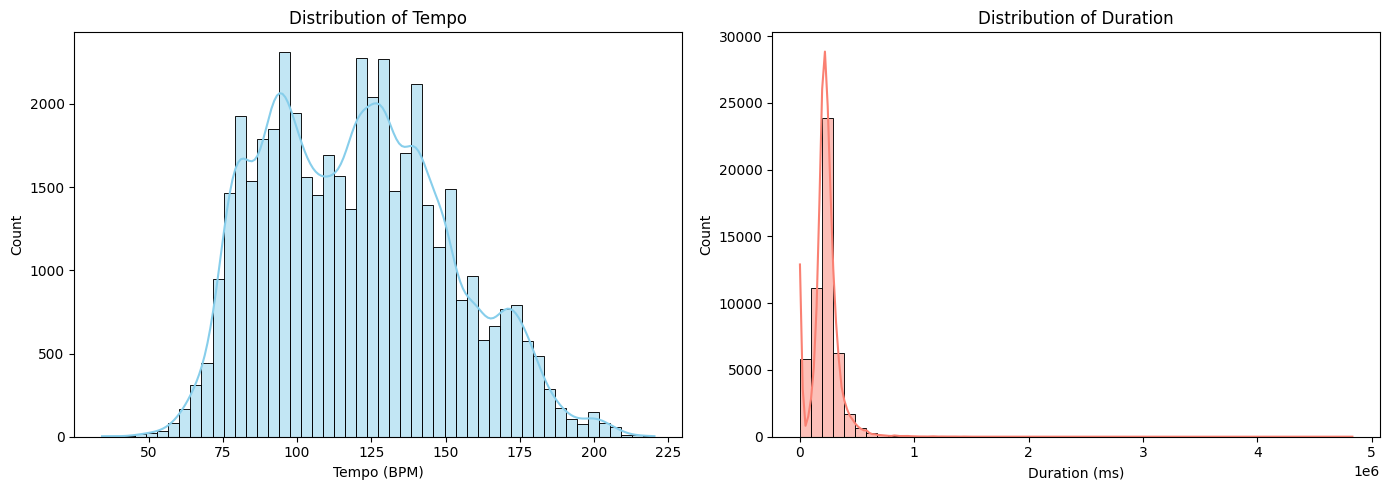

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot tempo distribution
sns.histplot(df['tempo'], kde=True, ax=axs[0], bins=50, color="skyblue")
axs[0].set_title('Distribution of Tempo')
axs[0].set_xlabel('Tempo (BPM)')

# Plot duration_ms distribution
sns.histplot(df['duration_ms'], kde=True, ax=axs[1], bins=50, color="salmon")
axs[1].set_title('Distribution of Duration')
axs[1].set_xlabel('Duration (ms)')

plt.tight_layout()
plt.show()

In [12]:
# replacing -1.0 with NaN in duration_ms for easier handling
df['duration_ms'] = df['duration_ms'].replace(-1.0, pd.NA)

# imputing duration per genre
df['duration_ms'] = df.groupby('music_genre')['duration_ms'].transform(lambda x: x.fillna(x.median()))

/var/folders/5y/x9lllwn57cl49d4_g_834x4m0000gn/T/ipykernel_95222/2413013824.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['duration_ms'] = df.groupby('music_genre')['duration_ms'].transform(lambda x: x.fillna(x.median()))
/var/folders/5y/x9lllwn57cl49d4_g_834x4m0000gn/T/ipykernel_95222/2413013824.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['duration_ms'] = df.groupby('music_genre')['duration_ms'].transform(lambda x: x.fillna(x.median()))
/var/folders/5y/x9lllwn57cl49d4_g_834x4m0000gn/T/ipykernel_95222/2413013824.py:5: FutureWarning: D

In [13]:
# imputing tempo per genre
df['tempo'] = df.groupby('music_genre')['tempo'].transform(lambda x: x.fillna(x.median()))

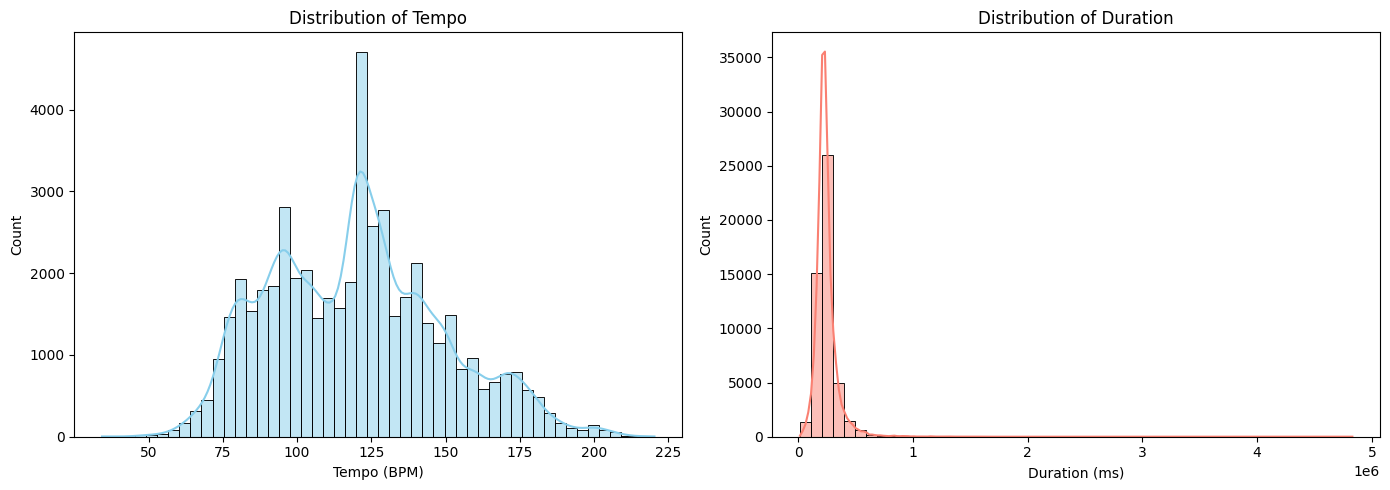

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# plotting new tempo distribution
sns.histplot(df['tempo'], kde=True, ax=axs[0], bins=50, color="skyblue")
axs[0].set_title('Distribution of Tempo')
axs[0].set_xlabel('Tempo (BPM)')

# plotting new duration_ms distribution
sns.histplot(df['duration_ms'], kde=True, ax=axs[1], bins=50, color="salmon")
axs[1].set_title('Distribution of Duration')
axs[1].set_xlabel('Duration (ms)')

plt.tight_layout()
plt.show()

In [15]:
df.isna().sum()

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
music_genre         0
key_A#              0
key_B               0
key_C               0
key_C#              0
key_D               0
key_D#              0
key_E               0
key_F               0
key_F#              0
key_G               0
key_G#              0
mode_Minor          0
dtype: int64

## Dimensionality Reduction

In [19]:
df.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
music_genre           int64
key_A#                 bool
key_B                  bool
key_C                  bool
key_C#                 bool
key_D                  bool
key_D#                 bool
key_E                  bool
key_F                  bool
key_F#                 bool
key_G                  bool
key_G#                 bool
mode_Minor             bool
dtype: object

In [228]:
# separating features and labels for unsupervised learning
X = df.drop(columns = ['music_genre'])
y = df['music_genre']
X.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
key_A#                 bool
key_B                  bool
key_C                  bool
key_C#                 bool
key_D                  bool
key_D#                 bool
key_E                  bool
key_F                  bool
key_F#                 bool
key_G                  bool
key_G#                 bool
mode_Minor             bool
dtype: object

In [229]:
X = X.copy()
# identifying numerical columns for standardization
num_cols = X.select_dtypes(include=['float64', 'int64']).columns

# converting boolean columns to float (0.0 / 1.0)
for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(float)

# standardizing
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X

popularity  acousticness  danceability  duration_ms    energy  \
0       -1.108003     -0.883886      0.524878     0.010209  1.289876   
1       -0.850633     -0.860390      0.356933    -0.243833  1.097101   
2       -1.043661     -0.888632      0.345737    -0.269120  0.586813   
3       -0.657606     -0.823184      1.207853    -0.728988  0.378918   
4       -0.786291     -0.883974      0.446504    -0.205373 -0.048212   
...           ...           ...           ...          ...       ...   
50000    0.950954     -0.799746      1.985998    -0.272639 -0.097351   
50001    1.787405     -0.437640      0.843973     0.072889 -0.898692   
50002    0.436214     -0.880107      0.754403    -0.515670  0.617052   
50003    1.337008     -0.654142      1.252639     0.175859 -0.482901   
50004    1.465693     -0.598772      1.700491     0.218262  0.159683   

       instrumentalness  liveness  loudness  speechiness     tempo  ...  \
0              1.875809 -0.488113  0.638132    -0.185322 -0.645558  ...   
1              2.361357 -0.432433  0.339248    -0.627258 -0.162673  ...   
2             -0.521812  2.104140  0.732892    -0.582867  0.281855  ...   
3             -0.550300 -0.228269  0.752201     1.434452  0.282540  ...   
4              2.235361 -0.228269  0.465324    -0.515787  0.864958  ...   
...                 ...       ...       ...          ...       ...  ...   
50000         -0.558074 -0.463366  0.342655     2.016466 -0.743449  ...   
50001         -0.558074 -0.525234 -0.110376    -0.380642  0.078239  ...   
50002         -0.558074 -0.314884  0.598865     0.517041  0.387411  ...   
50003         -0.558074 -0.543794  0.668150    -0.488166 -1.501050  ...   
50004         -0.558074  0.483208 -0.733132     0.073132 -0.703314  ...   

       key_C  key_C#  key_D  key_D#  key_E  key_F  key_F#  key_G  key_G#  \
0        0.0     0.0    0.0     0.0    0.0    0.0     0.0    0.0     0.0   
1        0.0     0.0    1.0     0.0    0.0    0.0     0.0    0.0     0.0   
2        0.0     0.0    0.0     0.0    0.0    0.0     0.0    0.0     1.0   
3        0.0     1.0    0.0     0.0    0.0    0.0     0.0    0.0     0.0   
4        0.0     0.0    0.0     0.0    0.0    0.0     1.0    0.0     0.0   
...      ...     ...    ...     ...    ...    ...     ...    ...     ...   
50000    0.0     1.0    0.0     0.0    0.0    0.0     0.0    0.0     0.0   
50001    0.0     0.0    0.0     0.0    0.0    0.0     0.0    0.0     0.0   
50002    0.0     0.0    1.0     0.0    0.0    0.0     0.0    0.0     0.0   
50003    0.0     0.0    0.0     0.0    0.0    0.0     0.0    1.0     0.0   
50004    0.0     0.0    0.0     0.0    0.0    0.0     1.0    0.0     0.0   

       mode_Minor  
0             1.0  
1             1.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
50000         0.0  
50001         0.0  
50002         0.0  
50003         1.0  
50004         1.0  

[50000 rows x 23 columns]

### Principal Component Analysis

#### With categorical variables

In [78]:
from sklearn.decomposition import PCA

In [79]:
# PCA 
pca = PCA(n_components = 23, whiten = True)
X_pca = pca.fit_transform(X)
print("Explained Variance: ", pca.explained_variance_ratio_[0:2].sum())

Explained Variance:  0.42072860070178925


In [80]:
pca.explained_variance_ratio_

array([0.30871559, 0.11201301, 0.0874697 , 0.08062851, 0.07815435,
       0.0678796 , 0.06039709, 0.0495031 , 0.03827832, 0.02136618,
       0.01934556, 0.00938231, 0.00929496, 0.00884018, 0.00871502,
       0.00732178, 0.00662526, 0.00623157, 0.00580028, 0.0053957 ,
       0.00519773, 0.00279824, 0.00064597])

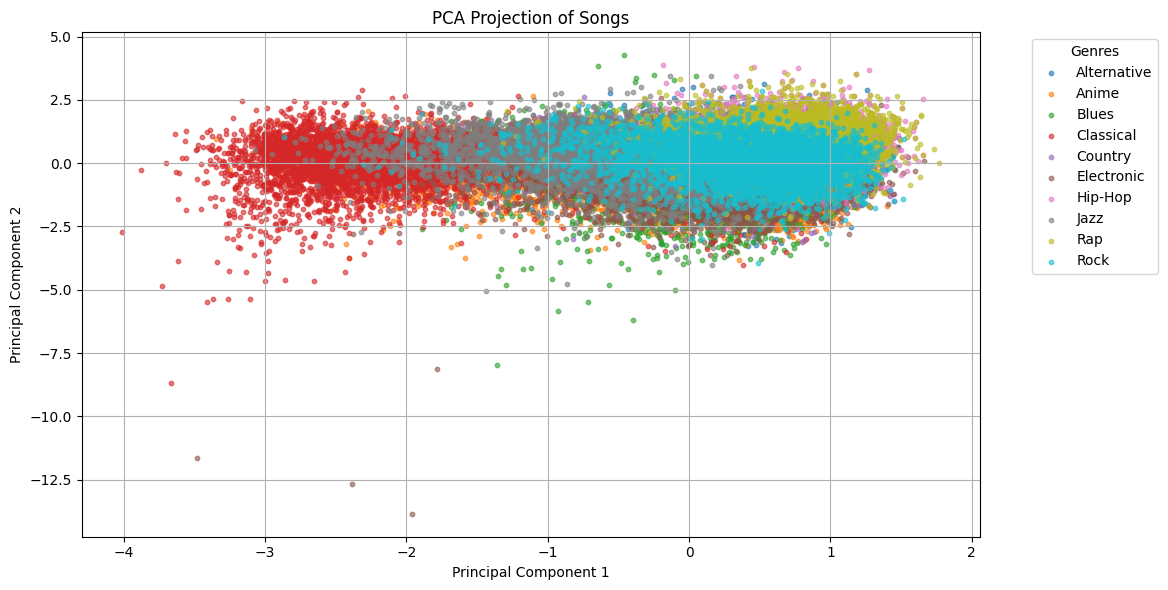

In [81]:
# plotting PCA projection in 2D
unique_labels = np.unique(y)
genre_names = le.inverse_transform(unique_labels)  # back to original names
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(10, 6))

# plotting each genre with its own color and label
for i, label in enumerate(unique_labels):
    ix = y == label
    plt.scatter(X_pca[ix, 0], X_pca[ix, 1],
                c=[colors[i]], label=genre_names[i], s=10, alpha=0.6)

plt.title('PCA Projection of Songs')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


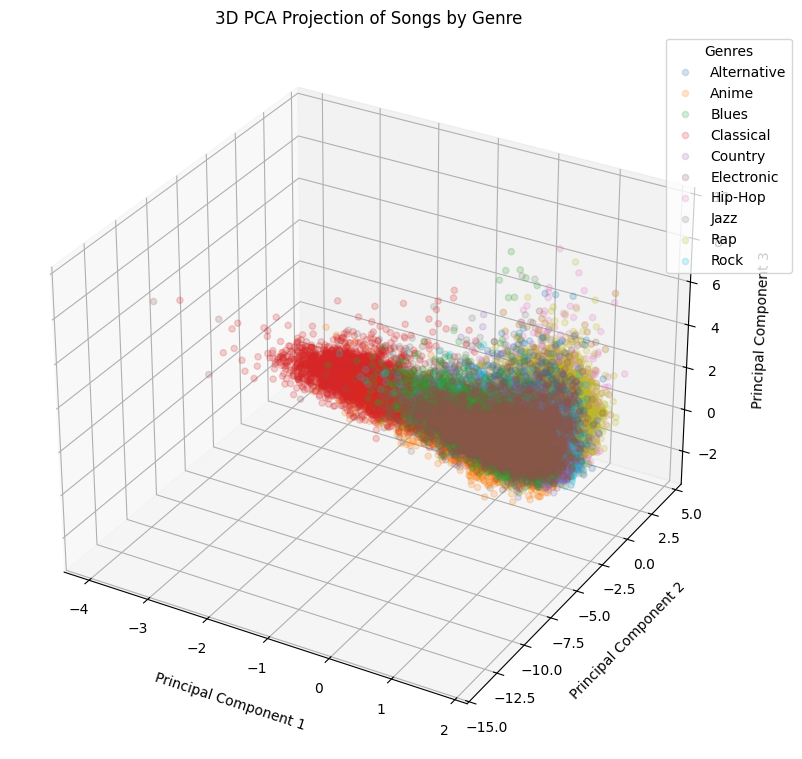

In [82]:
# plotting PCA projection in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

unique_labels = np.unique(y)
genre_names = le.inverse_transform(unique_labels)  # Map back to original names
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

# plotting each genre as a separate group
for i, label in enumerate(unique_labels):
    ix = y == label
    ax.scatter(X_pca[ix, 0], X_pca[ix, 1], X_pca[ix, 2],
               label=genre_names[i], color=colors[i], alpha=0.2)


ax.set_xlabel('Principal Component 1', labelpad=12)
ax.set_ylabel('Principal Component 2', labelpad=12)
ax.set_zlabel('Principal Component 3', labelpad=12)
plt.title("3D PCA Projection of Songs by Genre")

plt.legend(title="Genres", loc='upper right', bbox_to_anchor=(1.1, 1))
plt.tight_layout()
plt.show()

In [84]:
print("Explained Variance: ", pca.explained_variance_ratio_[0:3].sum())

Explained Variance:  0.5081983013611311


#### Without categorical variables

In [28]:
# dropping categorical variables
cols_to_drop = df.loc[:, 'music_genre':'mode_Minor'].columns
X_ = df.drop(columns=cols_to_drop)

In [29]:
# standardizing variables
X_ = X_.astype(float)
scaler = StandardScaler()
X_ = scaler.fit_transform(X_)

In [30]:
pca_ = PCA(n_components = 3, whiten = True)
X__pca = pca_.fit_transform(X_)
print("Explained Variance: ", pca_.explained_variance_ratio_[0:2].sum())

Explained Variance:  0.4607787182396653


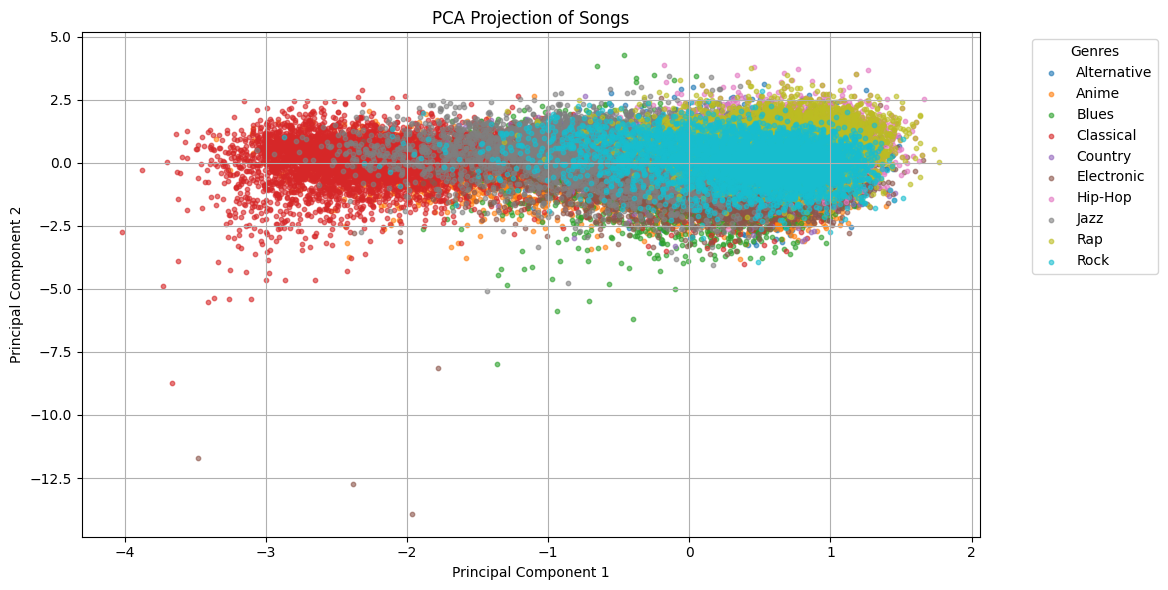

In [31]:
# plotting PCA projection in 2D
unique_labels = np.unique(y)
genre_names = le.inverse_transform(unique_labels)  # back to original names
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(10, 6))

for i, label in enumerate(unique_labels):
    ix = y == label
    plt.scatter(X__pca[ix, 0], X__pca[ix, 1],
                c=[colors[i]], label=genre_names[i], s=10, alpha=0.6)

plt.title('PCA Projection of Songs')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


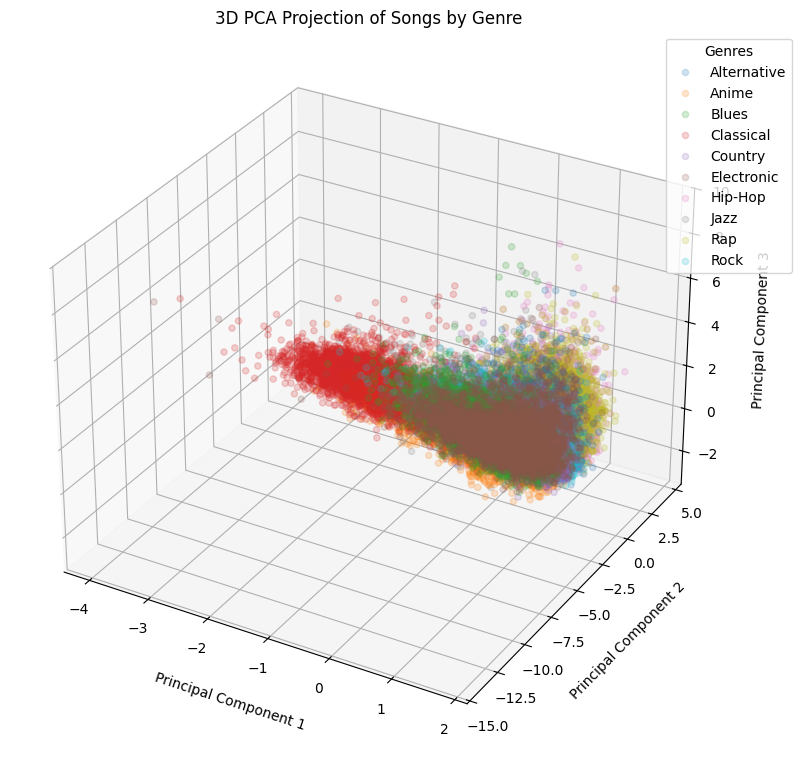

In [32]:
# plotting PCA projection in 2D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

unique_labels = np.unique(y)
genre_names = le.inverse_transform(unique_labels)  # Map back to original names
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for i, label in enumerate(unique_labels):
    ix = y == label
    ax.scatter(X__pca[ix, 0], X__pca[ix, 1], X__pca[ix, 2],
               label=genre_names[i], color=colors[i], alpha=0.2)

# Axis labels and formatting
ax.set_xlabel('Principal Component 1', labelpad=12)
ax.set_ylabel('Principal Component 2', labelpad=12)
ax.set_zlabel('Principal Component 3', labelpad=12)
plt.title("3D PCA Projection of Songs by Genre")

plt.legend(title="Genres", loc='upper right', bbox_to_anchor=(1.1, 1))
plt.tight_layout()
plt.show()

In [33]:
print("Explained Variance: ", pca_.explained_variance_ratio_.sum())

Explained Variance:  0.5565190548416183


### tSNE

In [225]:
from sklearn.manifold import TSNE

In [233]:
# tSNE
tsne = TSNE(n_components = 3, perplexity = 20, n_jobs = 5, verbose = False)
X_tsne = tsne.fit_transform(X)

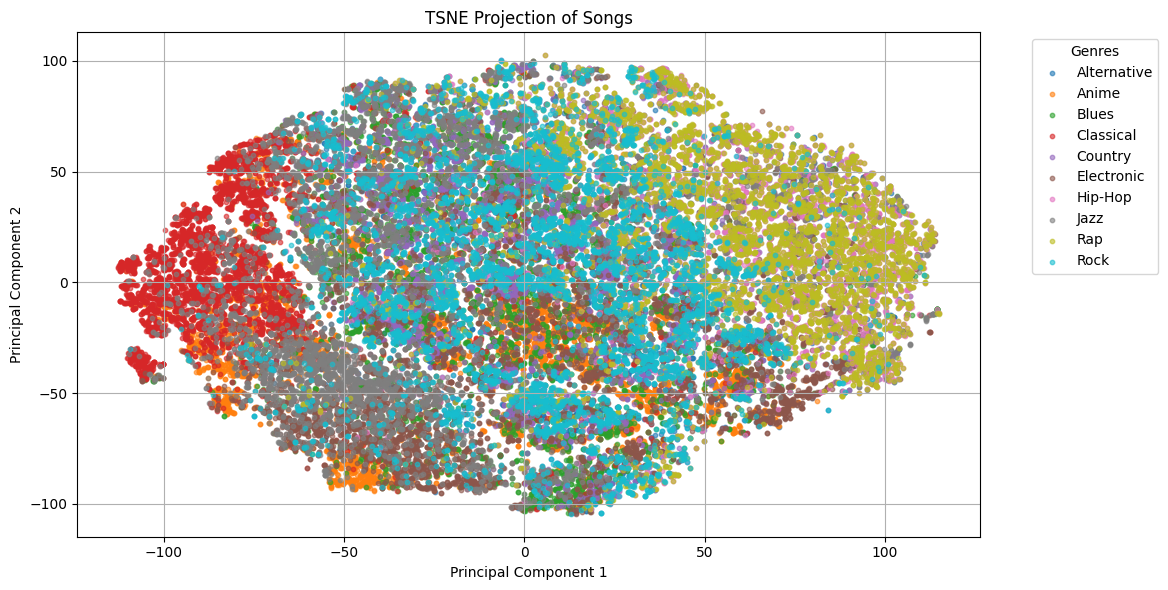

In [232]:
# plotting tSNE projection in 2D
unique_labels = np.unique(y)
genre_names = le.inverse_transform(unique_labels)  # back to original names
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(10, 6))


for i, label in enumerate(unique_labels):
    ix = y == label
    plt.scatter(X_tsne[ix, 0], X_tsne[ix, 1],
                c=[colors[i]], label=genre_names[i], s=10, alpha=0.6)

plt.title('TSNE Projection of Songs')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


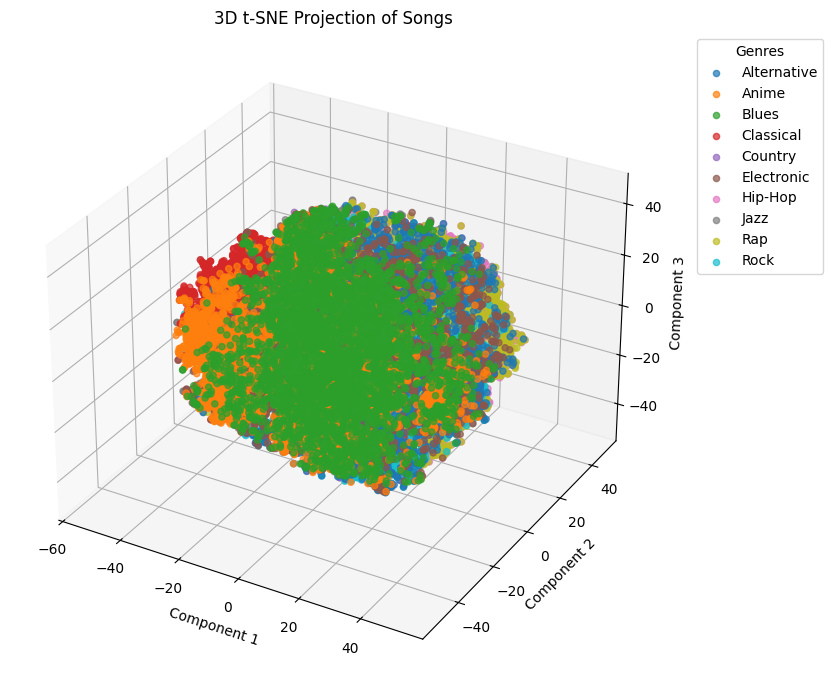

In [234]:
# plotting tSNE projection in 3D
unique_labels = np.unique(y)
genre_names = le.inverse_transform(unique_labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(unique_labels):
    ix = y == label
    ax.scatter(X_tsne[ix, 0], X_tsne[ix, 1], X_tsne[ix, 2],
               c=[colors[i]], label=genre_names[i], s=20, alpha=0.7)

ax.set_title('3D t-SNE Projection of Songs')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [231]:
print("KL Divergence: ", tsne.kl_divergence_)

KL Divergence:  3.171164035797119


### Linear Discriminant Analysis

In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [86]:
# LDA
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit_transform(X, y)

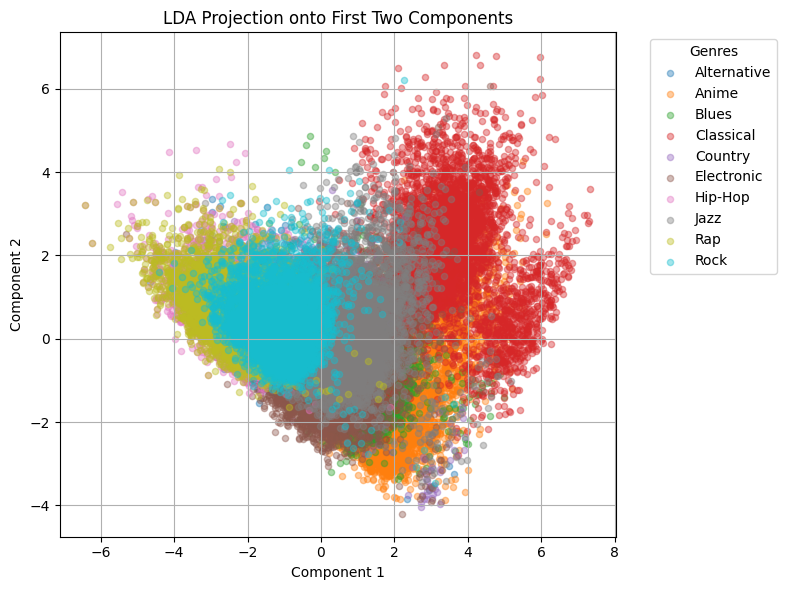

In [175]:
# plotting LDA projection in 2D
unique_labels = np.unique(y)
genre_names = le.inverse_transform(unique_labels)  # using your fitted LabelEncoder
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8, 6))

for i, label in enumerate(unique_labels):
    ix = y == label
    plt.scatter(X_lda[ix, 0], X_lda[ix, 1], 
                c=[colors[i]], label=genre_names[i], alpha=0.4, s=20)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('LDA Projection onto First Two Components')
plt.grid(True)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


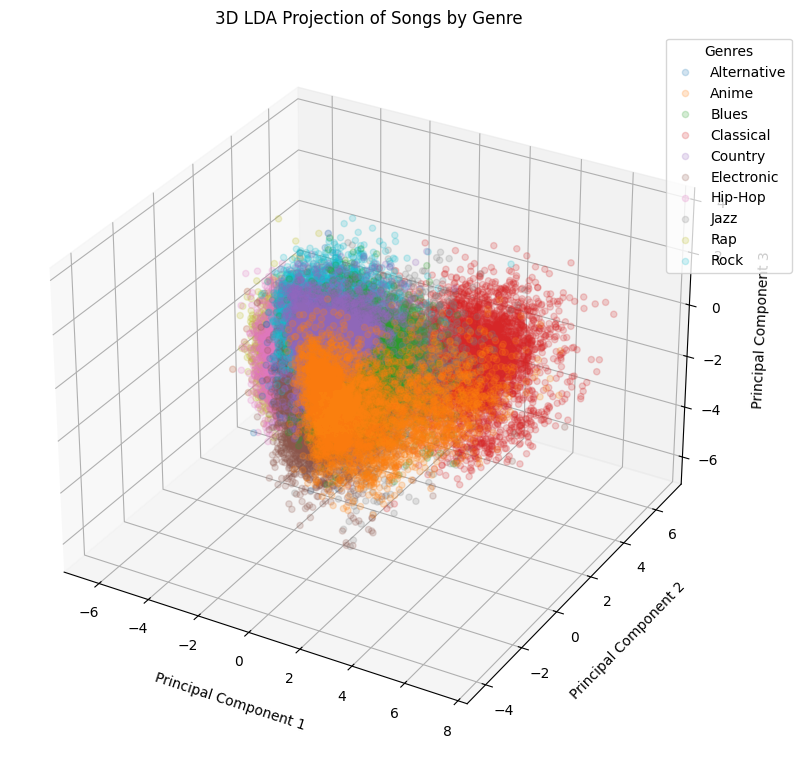

In [88]:
# plotting tSNE projection in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

unique_labels = np.unique(y)
genre_names = le.inverse_transform(unique_labels) 
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for i, label in enumerate(unique_labels):
    ix = y == label
    ax.scatter(X_lda[ix, 0], X_lda[ix, 1], X_lda[ix, 2],
               label=genre_names[i], color=colors[i], alpha=0.2)

ax.set_xlabel('Principal Component 1', labelpad=12)
ax.set_ylabel('Principal Component 2', labelpad=12)
ax.set_zlabel('Principal Component 3', labelpad=12)
plt.title("3D LDA Projection of Songs by Genre")

plt.legend(title="Genres", loc='upper right', bbox_to_anchor=(1.1, 1))
plt.tight_layout()
plt.show()

## Clustering

### KMeans

In [90]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [102]:
# PCA
X_pca = PCA(n_components = 2, whiten = True).fit_transform(X)

In [103]:
X_pca

array([[ 0.3298486 , -0.52401137],
       [ 0.01947774, -0.7619078 ],
       [ 0.52016764, -1.4154614 ],
       ...,
       [ 0.8080908 ,  0.27240698],
       [ 0.39701427,  1.25777454],
       [ 0.68576236,  1.31987028]])

In [104]:
# finding optimal K using silhouette scores
min_clusters = 2
max_clusters = X.shape[1]

cluster_sizes = np.arange(min_clusters, (max_clusters + 1))
silhouette_sums = []

for c in cluster_sizes:
    kmeans = KMeans(n_clusters=c, init='k-means++')
    kmeans.fit(X_pca)
    labels = kmeans.predict(X_pca)
    silhouette_sums.append(np.sum(silhouette_samples(X_pca, labels)))    

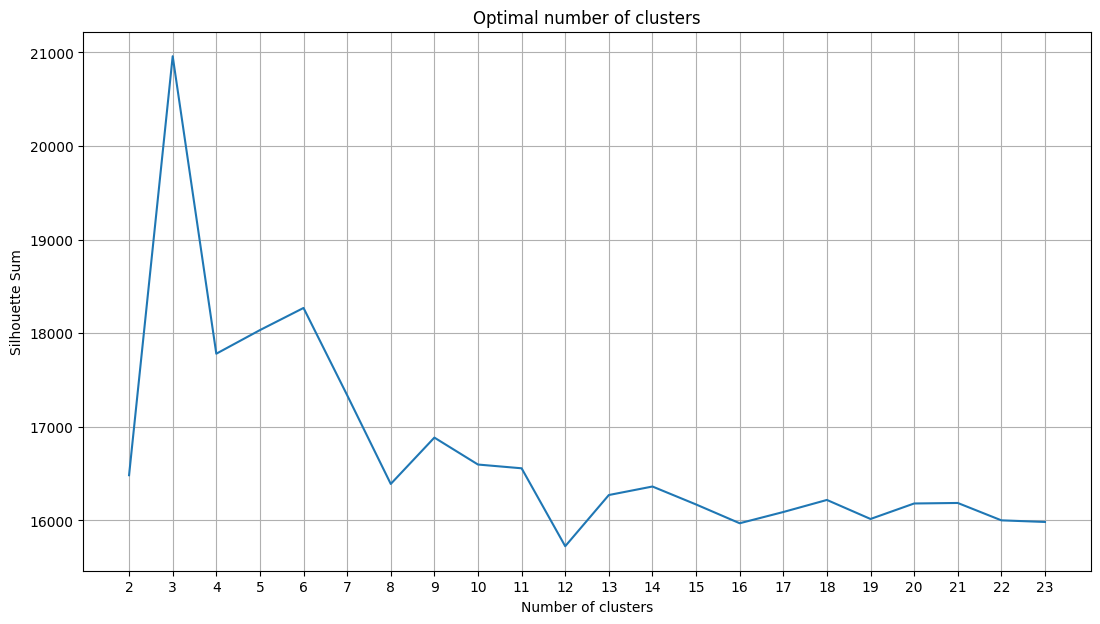

In [105]:
# plotting silhouette scores
plt.figure(figsize = (13, 7))
plt.plot(cluster_sizes, silhouette_sums)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Sum")
plt.title("Optimal number of clusters")
plt.xticks(cluster_sizes) 
plt.grid(True)
plt.show()

In [241]:
# performing KMeans with optimal K
kmeans = KMeans(n_clusters=3, init='k-means++')
labels = kmeans.fit_predict(X_pca)
inertia = kmeans.inertia_

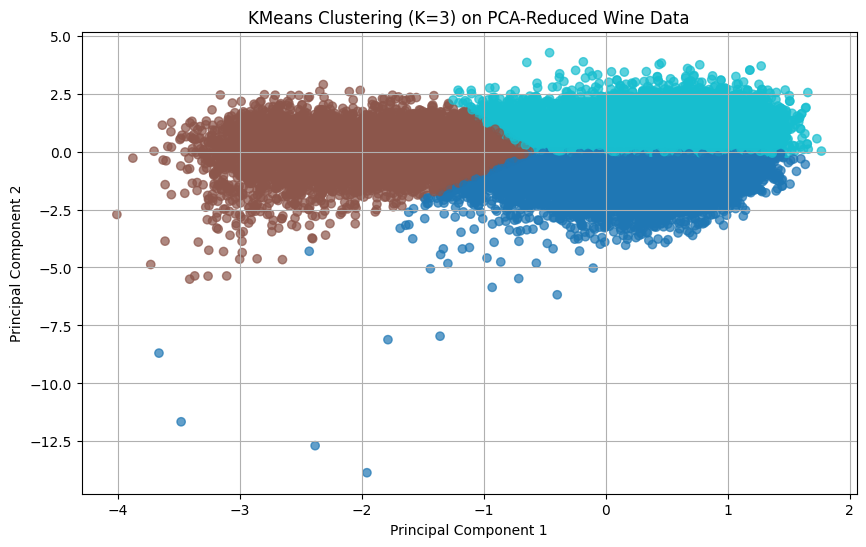

In [184]:
# plotting KMeans clusters on PCA projection in 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"KMeans Clustering (K={3}) on PCA-Reduced Wine Data")
plt.grid(True)
plt.show()

### DBScan

In [186]:
from sklearn.cluster import DBSCAN

In [208]:
# PCA
X_pca = PCA(n_components=2, whiten=True).fit_transform(X)

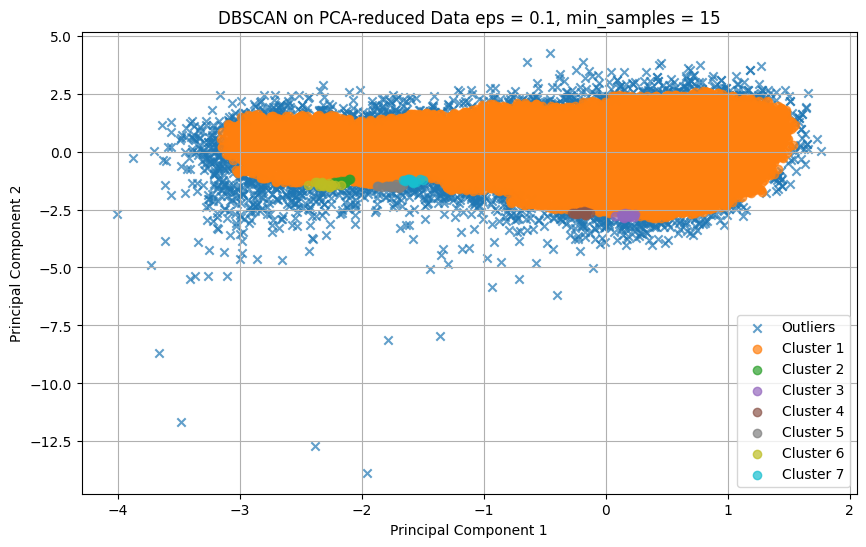

In [240]:
# plotting DBScan on PCA projection in 2D
dbscan = DBSCAN(eps=0.1, min_samples=15)
labels = dbscan.fit_predict(X_pca)

unique_labels = np.unique(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(10, 6))

for label, color in zip(unique_labels, colors):
    if label == -1:
        cluster_name = 'Outliers'
        marker = 'x'
    else:
        cluster_name = f'Cluster {label + 1}'
        marker = 'o'
    
    mask = labels == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                c=[color], label=cluster_name, alpha=0.7, marker=marker)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"DBSCAN on PCA-reduced Data eps = 0.1, min_samples = 15")
plt.grid(True)
plt.legend()
plt.show()

## Classification

### Regular Data

In [16]:
# dropping target and prepare X, y
X = df.drop(columns=['music_genre'])
y = df['music_genre']

# initializing empty splits
X_train = pd.DataFrame()
X_test = pd.DataFrame()
y_train = pd.Series(dtype='int64')
y_test = pd.Series(dtype='int64')

# genre-wise splitting
for genre in y.unique():
    genre_df = df[df['music_genre'] == genre]
    gen_x = genre_df.drop(columns=['music_genre'])
    gen_y = genre_df['music_genre']

    XTrain, XTest, yTrainSplit, yTestSplit = train_test_split(
        gen_x, gen_y, test_size=500, shuffle=True, random_state=42
    )

    X_train = pd.concat([X_train, XTrain])
    y_train = pd.concat([y_train, yTrainSplit])
    X_test = pd.concat([X_test, XTest])
    y_test = pd.concat([y_test, yTestSplit])

# concatenation and shuffling
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

# identifying numerical and boolean columns
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
bool_cols = X_train.select_dtypes(include=['bool', 'uint8']).columns

# standardizing columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

X_train = X_train_scaled.copy()
X_test = X_test_scaled.copy()


print(X_train_scaled.shape, y_train.shape)
print(X_test_scaled.shape, y_test.shape)
print("Scaled columns:", list(num_cols))
print("Boolean (untouched) columns:", list(bool_cols))

(45000, 23) (45000,)
(5000, 23) (5000,)
Scaled columns: ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
Boolean (untouched) columns: ['key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Minor']


In [17]:
y_train.value_counts()

3    4500
7    4500
6    4500
0    4500
4    4500
8    4500
2    4500
5    4500
1    4500
9    4500
Name: count, dtype: int64

#### Random Forest

In [18]:
# from sklearn.ensemble import RandomForestClassifier

In [19]:
# Hyperparameter tuning
rf = RandomForestClassifier(random_state=10978976)

random_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=10978976,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Best params from RandomizedSearchCV:")
print(random_search.best_params_)

# Step 2: Grid Search (Fine tuning)
best = random_search.best_params_
grid_params = {
    'n_estimators': [best['n_estimators'] - 50, best['n_estimators'], best['n_estimators'] + 50],
    'max_depth': [best['max_depth'], None] if best['max_depth'] else [None, 10, 20],
    'min_samples_split': [best['min_samples_split']],
    'min_samples_leaf': [best['min_samples_leaf']],
    'max_features': [best['max_features']],
    'bootstrap': [best['bootstrap']]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=grid_params,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best params from GridSearchCV:")
print(grid_search.best_params_)

# Final evaluation
y_pred = grid_search.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.8min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time= 2.7min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time= 2.4min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time= 2.1min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.8min
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 3.7min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time= 2.2min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  15.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  14.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  14.4s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time= 1.3min
[CV] END bootstrap=True, max_depth=Non

In [20]:
# Random Forest
random_forest = RandomForestClassifier(bootstrap = False, max_depth = 10, max_features = 'log2', min_samples_leaf = 2, min_samples_split = 10, n_estimators= 200, criterion='gini').fit(X_train, y_train)

y_score = random_forest.predict_proba(X_test)

# computing multiclass AUC
rf_auc = roc_auc_score(y_test, y_score, multi_class='ovr', average='macro')

print("Multiclass AUC of Random Forest Model:", rf_auc)

Multiclass AUC of Random Forest Model: 0.9289787111111112


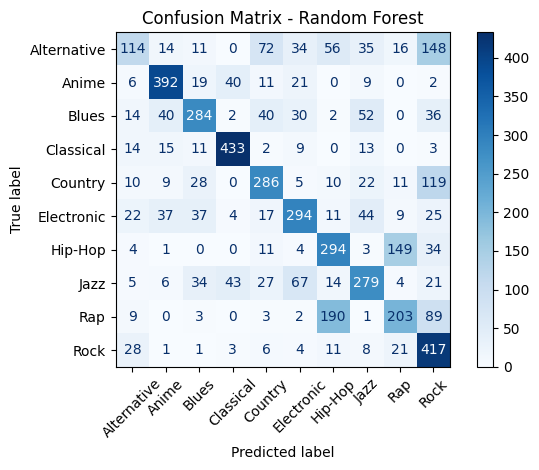

Accuracy: 59.92%


In [21]:
# computing confusion matrix and accuracy
y_pred = random_forest.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# displaying confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

# computing accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

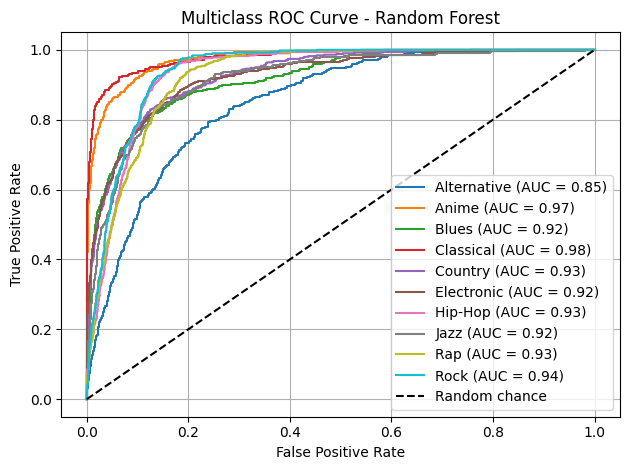

In [26]:
# plotting Random Forest AUCs
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{le.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

#### ADABoost

In [45]:
'''from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree''

In [ ]:
base_estimator = DecisionTreeClassifier()

# AdaBoost with new syntax
adb = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# RandomizedSearchCV
random_param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'estimator__max_depth': [1, 2, 3, 5],
    'estimator__min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(
    estimator=adb,
    param_distributions=random_param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best params from RandomizedSearchCV:")
print(random_search.best_params_)

# GridSearchCV
best = random_search.best_params_
grid_param = {
    'n_estimators': [best['n_estimators'] - 50, best['n_estimators'], best['n_estimators'] + 50],
    'learning_rate': [best['learning_rate'] / 2, best['learning_rate'], best['learning_rate'] * 2],
    'estimator__max_depth': [best['estimator__max_depth']],
    'estimator__min_samples_split': [best['estimator__min_samples_split']]
}

grid_search = GridSearchCV(
    estimator=adb,
    param_grid=grid_param,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best params from GridSearchCV:")
print(grid_search.best_params_)

# Final eval
y_pred = grid_search.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [35]:
# ADABoost
adaboost = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=3, min_samples_split = 10), algorithm="SAMME", n_estimators=200, learning_rate=0.1
).fit(X_train, y_train)

y_score = adaboost.predict_proba(X_test)
ada_auc = roc_auc_score(y_test, y_score, multi_class='ovr', average='macro')

# computing multiclass AUC
print("Multiclass AUC of ADABoosted Model:", ada_auc)

Multiclass AUC of ADABoosted Model: 0.9070756888888889


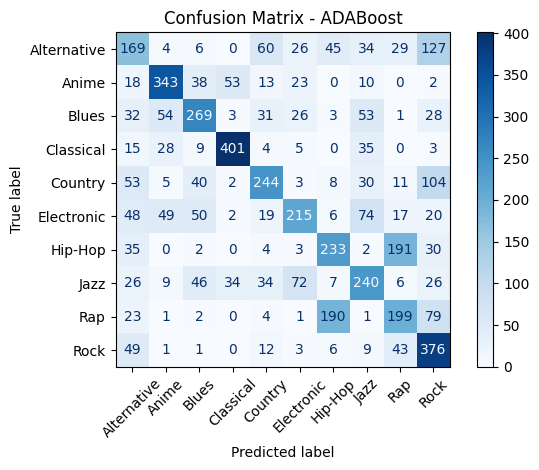

Accuracy: 53.78%


In [36]:
# computing confusion matrix and accuracy
y_pred = adaboost.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# displaying confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix - ADABoost')
plt.tight_layout()
plt.show()

# computing accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

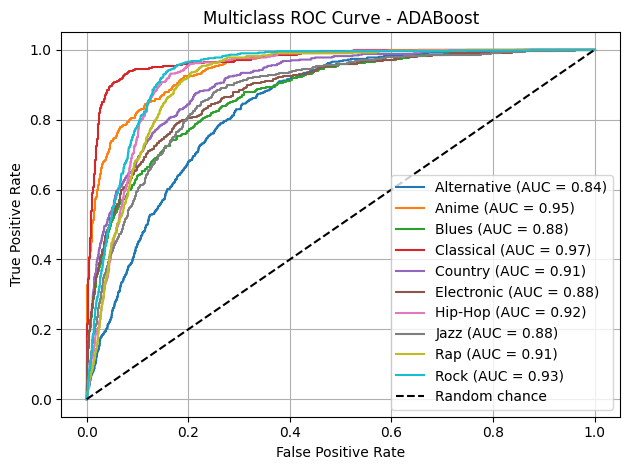

In [37]:
# plotting ADABoost AUCs
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{le.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - ADABoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Perceptron

In [111]:
from sklearn.linear_model import Perceptron

In [119]:
from sklearn.calibration import CalibratedClassifierCV # needed for multiclass Perceptron classification

# Perceptron
per = Perceptron(tol=1e-3, shuffle=True, random_state=1000)
calibrated_per = CalibratedClassifierCV(per, method='sigmoid', cv=3)  # or 'isotonic'

# fit
calibrated_per.fit(X_train, y_train)

# get probabilities
y_proba = calibrated_per.predict_proba(X_test)

# computing multiclass AUC
per_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
print("Multiclass AUC of the Calibrated Perceptron is", per_auc)

Multiclass AUC of the Calibrated Perceptron is 0.8448851999999999


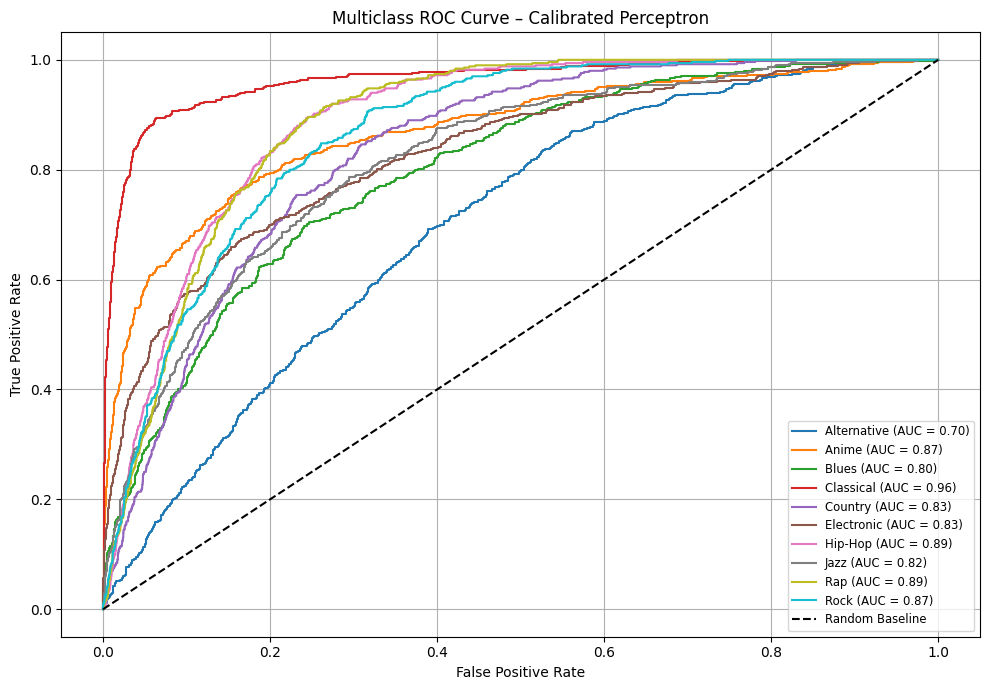

In [121]:
# plotting Perceptron AUCs
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]


y_proba = calibrated_per.predict_proba(X_test)

plt.figure(figsize=(10, 7))


class_labels = le.inverse_transform(np.arange(n_classes))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_labels[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve – Calibrated Perceptron')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Feedforward Neural Network

In [159]:
# converting training and testing data to tensors
X_train_pth = torch.as_tensor(X_train.astype(float).values, dtype=torch.float)
X_test_pth = torch.as_tensor(X_test.astype(float).values, dtype=torch.float)
y_train_pth = torch.as_tensor(y_train.values, dtype=torch.long)
y_test_pth = torch.as_tensor(y_test.values, dtype=torch.long)

print(X_train_pth.shape, y_train_pth.shape)
print(X_test_pth.shape, y_test_pth.shape)

torch.Size([45000, 23]) torch.Size([45000])
torch.Size([5000, 23]) torch.Size([5000])


##### 1 Hidden Layer - ReLU

Multiclass AUC Score: 0.8556024222222222


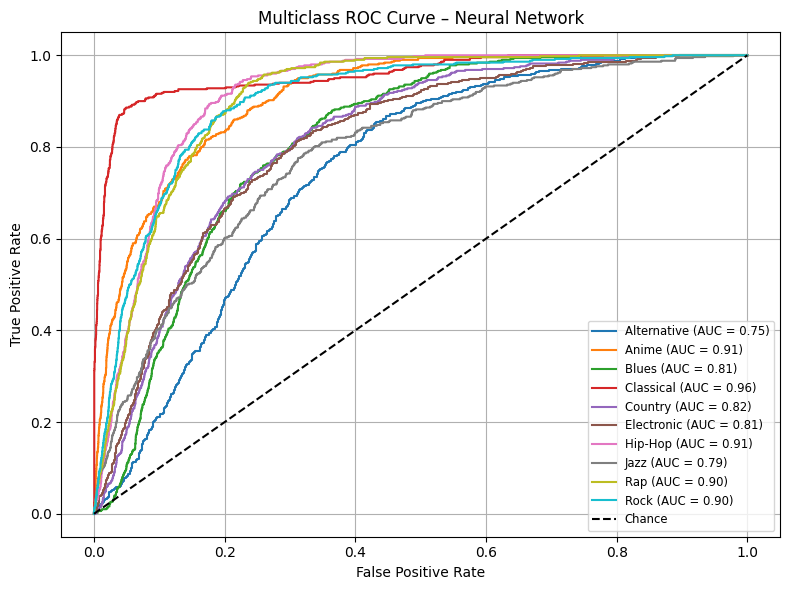

In [155]:
# simple neural network
input_size = X_train_pth.shape[1]
output_size = torch.unique(y_train_pth).numel()

learning_rate = 1e-3
lambda_l2 = 0.1

batch_size = 256

# define model with ReLu function
model_ = nn.Sequential(
    nn.Linear(input_size, 32),
    nn.ReLU(),
    nn.Linear(32, output_size),
)

# cross entropy loss for multiclass classification
criterion = torch.nn.CrossEntropyLoss()

# ADAM for efficient optimization
optimizer = torch.optim.Adam(model_.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# Training loop
for t in range(1000):
    
    # Forward pass over the model to get the logits 
    y_pred = model_(X_train_pth) #1
    # print(y_pred.shape, y_train_pth.shape)

    y_train_pth = y_train_pth.long()
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y_train_pth) #2
    
    # print(y_pred, y_train_pth)
    # break
    score, predicted = torch.max(y_pred, 1)
    acc = (y_train_pth == predicted).sum() / len(y_train)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # reset (zero) the gradients before running the backward pass over the model
    # we need to do this because the gradients get accumulated at the same place across iterations
    optimizer.zero_grad() #3
    
    # Backward pass to compute the gradient of loss w.r.t our learnable params (weights and biases)
    loss.backward() #4
    
    # Update params
    optimizer.step() #5

# Forward pass
logits = model_(X_test_pth)
probs = torch.softmax(logits, dim=1).detach().cpu().numpy()

# One-hot encode true labels
y_true_bin = label_binarize(y_test, classes=np.arange(probs.shape[1]))

# Multiclass AUC
ffnn_auc = roc_auc_score(y_true_bin, probs, average='macro', multi_class='ovr')
print("Multiclass AUC Score:", ffnn_auc)


# plotting AUCs
model_.eval()

with torch.no_grad():
    logits = model_(X_test_pth)
    probs = F.softmax(logits, dim=1).cpu().numpy()

y_true = label_binarize(y_test_pth.cpu().numpy(), classes=np.arange(probs.shape[1]))

plt.figure(figsize=(8, 6))

for i in range(probs.shape[1]):
    fpr, tpr, _ = roc_curve(y_true[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{le.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve – Neural Network')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

In [156]:
# computing model accuracy
model_.eval()

with torch.no_grad():
    outputs = model_(X_test_pth)
    predictions = torch.argmax(outputs, dim=1)

accuracy = (predictions == y_test_pth).float().mean().item()
print(f"Test Accuracy: {accuracy:.2%}")

Test Accuracy: 35.30%


##### 2 Hidden Layers - ReLU

Multiclass AUC Score: 0.9099428444444444


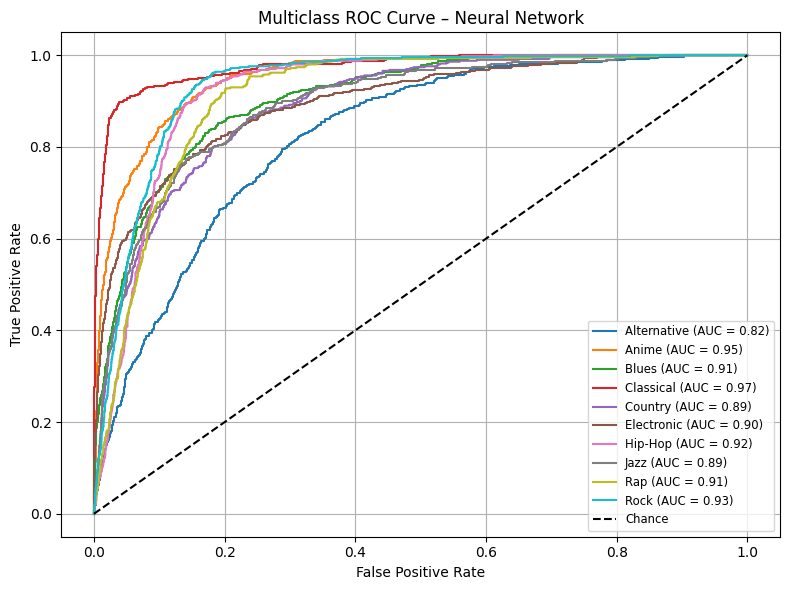

In [163]:
# neural network with 2 hidden layers
input_size = X_train_pth.shape[1]
output_size = torch.unique(y_train_pth).numel()

learning_rate = 1e-1
lambda_l2 = 0.1

batch_size = 256

# define model with ReLu function
model_ = nn.Sequential(
     nn.Linear(input_size, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.Linear(32, 16),
            nn.Linear(16, output_size)
)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model_.parameters(), lr=learning_rate, momentum=lambda_l2) # built-in L2

# Training loop
for t in range(1000):
    
    # Forward pass over the model to get the logits 
    y_pred = model_(X_train_pth) #1
    # print(y_pred.shape, y_train_pth.shape)

    y_train_pth = y_train_pth.long()
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y_train_pth) #2
    
    # print(y_pred, y_train_pth)
    # break
    score, predicted = torch.max(y_pred, 1)
    acc = (y_train_pth == predicted).sum() / len(y_train)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # reset (zero) the gradients before running the backward pass over the model
    # we need to do this because the gradients get accumulated at the same place across iterations
    optimizer.zero_grad() #3
    
    # Backward pass to compute the gradient of loss w.r.t our learnable params (weights and biases)
    loss.backward() #4
    
    # Update params
    optimizer.step() #5


logits = model_(X_test_pth)
probs = torch.softmax(logits, dim=1).detach().cpu().numpy()

y_true_bin = label_binarize(y_test, classes=np.arange(probs.shape[1]))

# Multiclass AUC
ffnn_auc = roc_auc_score(y_true_bin, probs, average='macro', multi_class='ovr')
print("Multiclass AUC Score:", ffnn_auc)


# Plotting AUCs
model_.eval()


with torch.no_grad():
    logits = model_(X_test_pth)
    probs = F.softmax(logits, dim=1).cpu().numpy()


y_true = label_binarize(y_test_pth.cpu().numpy(), classes=np.arange(probs.shape[1]))


plt.figure(figsize=(8, 6))

for i in range(probs.shape[1]):
    fpr, tpr, _ = roc_curve(y_true[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{le.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve – Neural Network')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

In [164]:
# computing accuracy
model_.eval()

with torch.no_grad():
    outputs = model_(X_test_pth)
    predictions = torch.argmax(outputs, dim=1)

accuracy = (predictions == y_test_pth).float().mean().item()
print(f"Test Accuracy: {accuracy:.2%}")

Test Accuracy: 53.78%


#####  3 Hidden Layers - ReLU

Multiclass AUC Score: 0.8806492


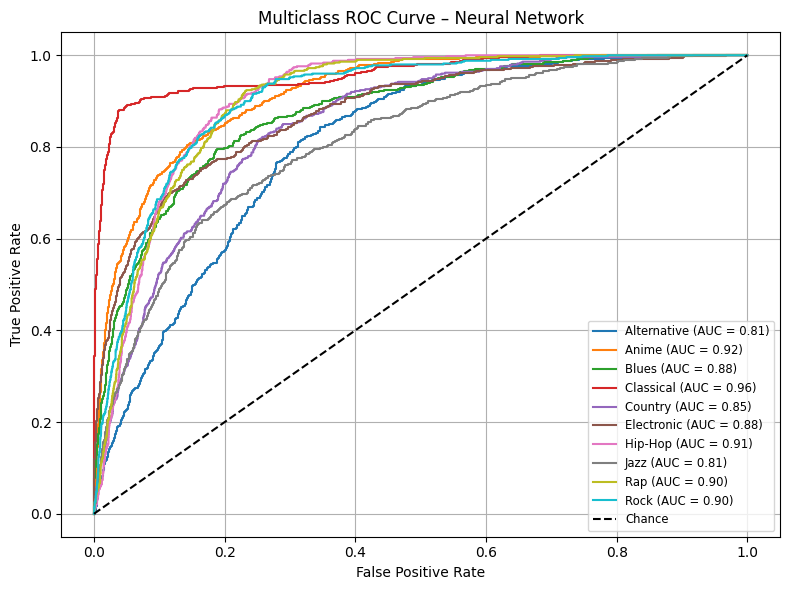

In [249]:
# neural network with 3 hidden layers
input_size = X_train_pth.shape[1]
output_size = torch.unique(y_train_pth).numel()

learning_rate = 1e-2
lambda_l2 = 0.5

batch_size = 256

# define model with ReLu function
model_ = nn.Sequential(
     nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.Linear(64, 32),
            nn.Linear(32, 16),
            nn.Linear(16, output_size)
)

'''model_ = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.Linear(32, output_size)
        )'''


criterion = torch.nn.CrossEntropyLoss()


optimizer = torch.optim.SGD(model_.parameters(), lr=learning_rate, momentum=lambda_l2) # built-in L2

# Training loop
for t in range(1000):
    
    # Forward pass over the model to get the logits 
    y_pred = model_(X_train_pth) #1
    # print(y_pred.shape, y_train_pth.shape)

    y_train_pth = y_train_pth.long()
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y_train_pth) #2
    
    # print(y_pred, y_train_pth)
    # break
    score, predicted = torch.max(y_pred, 1)
    acc = (y_train_pth == predicted).sum() / len(y_train)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # reset (zero) the gradients before running the backward pass over the model
    # we need to do this because the gradients get accumulated at the same place across iterations
    optimizer.zero_grad() #3
    
    # Backward pass to compute the gradient of loss w.r.t our learnable params (weights and biases)
    loss.backward() #4
    
    # Update params
    optimizer.step() #5


logits = model_(X_test_pth)
probs = torch.softmax(logits, dim=1).detach().cpu().numpy()


y_true_bin = label_binarize(y_test, classes=np.arange(probs.shape[1]))

# Multiclass AUC
ffnn_auc = roc_auc_score(y_true_bin, probs, average='macro', multi_class='ovr')
print("Multiclass AUC Score:", ffnn_auc)


# Plotting
model_.eval()


with torch.no_grad():
    logits = model_(X_test_pth)
    probs = F.softmax(logits, dim=1).cpu().numpy()


y_true = label_binarize(y_test_pth.cpu().numpy(), classes=np.arange(probs.shape[1]))


plt.figure(figsize=(8, 6))

for i in range(probs.shape[1]):
    fpr, tpr, _ = roc_curve(y_true[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{le.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve – Neural Network')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

In [250]:
# computing accuracy
model_.eval()

with torch.no_grad():
    outputs = model_(X_test_pth)
    predictions = torch.argmax(outputs, dim=1)

accuracy = (predictions == y_test_pth).float().mean().item()
print(f"Test Accuracy: {accuracy:.2%}")

Test Accuracy: 45.62%


#### Deep Neural Network

In [55]:

# defining model
class GenreClassifier(nn.Module):
    def __init__(self, input_size, output_size):
        super(GenreClassifier, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 128),  # add more layers at the same width
            nn.BatchNorm1d(128), # NEW
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_size)
        )

    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.network(x)


In [39]:
# training module
def train(epoch, model, optimizer, loss_fn, batch_size, train_dataset, verbose=True):
    from torch.utils.data import DataLoader

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    model.train()
    epoch_loss = 0
    losses = []

    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()

        data = data.float()             # ensure float input
        target = target.long()          # ensure long/int64 targets

        output = model(data)            # logits shape: [batch_size, num_classes]

        loss = loss_fn(output, target)  # CrossEntropyLoss expects (logits, class index)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        if batch_idx % 100 == 0:
            losses.append(loss.item())
            if verbose:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.item()))
    
    return losses


In [40]:


# testing module
def test(model, test_dataset, batch_size=64, verbose=False, num_classes=10):
    model.eval()
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    test_loss = 0
    correct = 0
    criterion = torch.nn.CrossEntropyLoss()
    all_targets = []
    all_outputs = []
 
    with torch.no_grad():
        for data, target in test_loader:
            data = data.float()
            target = target.long()

            output = model(data)  # shape: [batch_size, num_classes]
            loss = criterion(output, target)
            test_loss += loss.item() * data.size(0)

            pred = output.argmax(dim=1)
            correct += pred.eq(target).sum().item()

            all_targets.append(target.cpu())
            all_outputs.append(F.softmax(output, dim=1).cpu())  # softmax for AUC

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)

    # Stack all outputs and targets
    all_targets = torch.cat(all_targets)
    all_outputs = torch.cat(all_outputs)

    # One-hot encode the targets for AUC
    y_true = F.one_hot(all_targets, num_classes=num_classes).numpy()
    y_score = all_outputs.numpy()

    try:
        average_auc = roc_auc_score(y_true, y_score, multi_class='ovr', average='macro')
    except ValueError:
        average_auc = float('nan')

    if verbose:
        print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)')
        print(f'Average AUC: {average_auc:.4f}')

    return test_loss, accuracy, average_auc

In [41]:
# convert to tensors
X_train_pth = torch.as_tensor(X_train.astype(float).values, dtype=torch.float)
X_test_pth = torch.as_tensor(X_test.astype(float).values, dtype=torch.float)
y_train_pth = torch.as_tensor(y_train.values, dtype=torch.long)
y_test_pth = torch.as_tensor(y_test.values, dtype=torch.long)

print(X_train_pth.shape, y_train_pth.shape)
print(X_test_pth.shape, y_test_pth.shape)

torch.Size([45000, 23]) torch.Size([45000])
torch.Size([5000, 23]) torch.Size([5000])


In [42]:
X_train_pth

tensor([[-0.7891,  2.0023, -1.5078,  ...,  0.0000,  0.0000,  0.0000],
        [-0.9826, -0.2989, -0.0240,  ...,  1.0000,  0.0000,  1.0000],
        [ 0.3071, -0.8163,  1.2134,  ...,  0.0000,  0.0000,  1.0000],
        ...,
        [-0.3377,  1.9084, -1.5246,  ...,  0.0000,  1.0000,  0.0000],
        [-0.2733, -0.8908,  0.9782,  ...,  0.0000,  0.0000,  1.0000],
        [ 1.0165,  1.2371,  1.3310,  ...,  0.0000,  0.0000,  1.0000]])

In [43]:
y_test.value_counts()

0    500
8    500
7    500
1    500
5    500
4    500
2    500
9    500
6    500
3    500
Name: count, dtype: int64

In [55]:
y_train.value_counts()

3    4500
7    4500
6    4500
0    4500
4    4500
8    4500
2    4500
5    4500
1    4500
9    4500
Name: count, dtype: int64

In [44]:
# create datasets for DataLoader
train_dataset = TensorDataset(X_train_pth, y_train_pth)
test_dataset = TensorDataset(X_test_pth, y_test_pth)

In [58]:
# training the model
input_size = X_train_pth.shape[1]
output_size = torch.unique(y_train_pth).numel()

learning_rate = 2e-2

batch_size = 256

model_fnn = GenreClassifier(input_size, output_size)

optimizer = torch.optim.SGD(model_fnn.parameters(), lr = learning_rate, momentum = 0.4)
criterion = torch.nn.CrossEntropyLoss(label_smoothing=0.1)

epoch_aucs = []

for epoch in range(0, 100):
    train(epoch, model_fnn, batch_size = batch_size, loss_fn = criterion, train_dataset = train_dataset, optimizer = optimizer, verbose=False)
    _, _, average_auc = test(model_fnn, test_dataset, batch_size = batch_size, num_classes = output_size, verbose=True)
    epoch_aucs.append(average_auc)


Test set: Average loss: 1.6638, Accuracy: 2054/5000 (41.08%)
Average AUC: 0.8704

Test set: Average loss: 1.3978, Accuracy: 2441/5000 (48.82%)
Average AUC: 0.8934

Test set: Average loss: 1.3131, Accuracy: 2599/5000 (51.98%)
Average AUC: 0.9029

Test set: Average loss: 1.2648, Accuracy: 2702/5000 (54.04%)
Average AUC: 0.9084

Test set: Average loss: 1.2383, Accuracy: 2735/5000 (54.70%)
Average AUC: 0.9119

Test set: Average loss: 1.2182, Accuracy: 2750/5000 (55.00%)
Average AUC: 0.9142

Test set: Average loss: 1.2041, Accuracy: 2777/5000 (55.54%)
Average AUC: 0.9161

Test set: Average loss: 1.1956, Accuracy: 2791/5000 (55.82%)
Average AUC: 0.9174

Test set: Average loss: 1.1866, Accuracy: 2831/5000 (56.62%)
Average AUC: 0.9185

Test set: Average loss: 1.1834, Accuracy: 2814/5000 (56.28%)
Average AUC: 0.9194

Test set: Average loss: 1.1732, Accuracy: 2823/5000 (56.46%)
Average AUC: 0.9200

Test set: Average loss: 1.1703, Accuracy: 2856/5000 (57.12%)
Average AUC: 0.9207

Test set: Avera

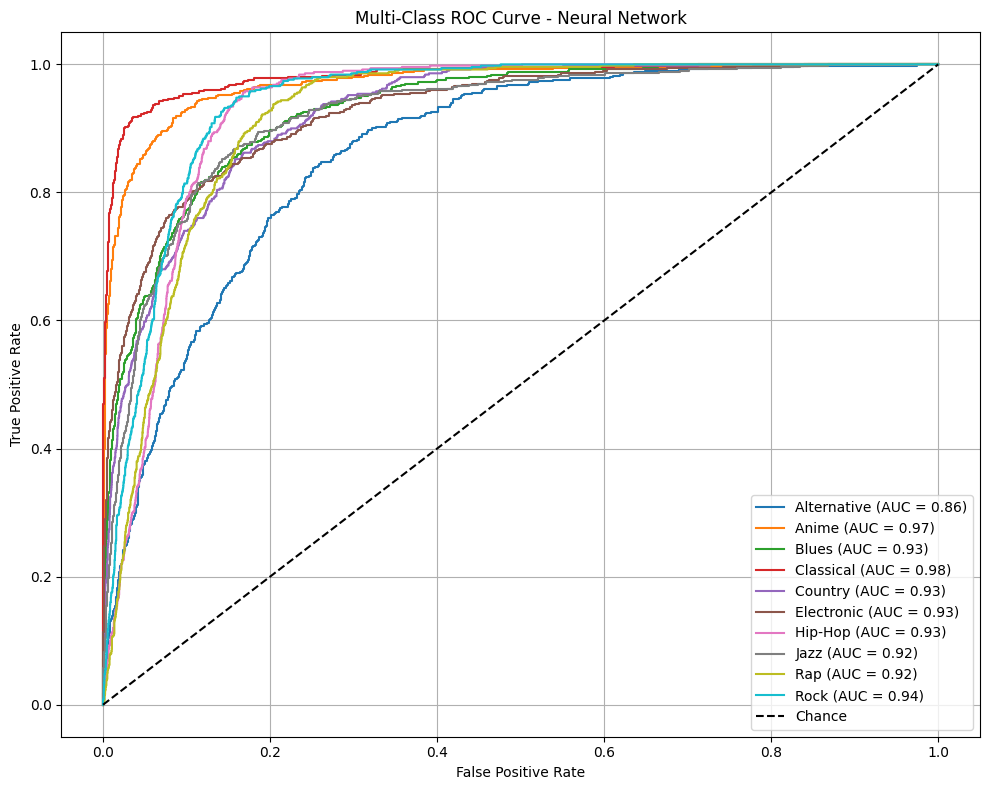

In [59]:
# plotting AUCs
model_fnn.eval()


with torch.no_grad():
    logits = model_fnn(X_test_pth.float())
    probs = F.softmax(logits, dim=1).cpu().numpy()


y_true = label_binarize(y_test_pth.cpu().numpy(), classes=np.arange(probs.shape[1]))


plt.figure(figsize=(10, 8))

for i in range(probs.shape[1]):
    fpr, tpr, _ = roc_curve(y_true[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{le.classes_[i]} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [66]:
# Define base XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Run GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc_ovr',  # for multiclass AUC
    cv=3,
    verbose=1,
    n_jobs=1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Params:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

# Predict and evaluate on test set
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)

# AUC score
auc_score = roc_auc_score(label_binarize(y_test, classes=np.unique(y_test)), y_prob, multi_class='ovr')
print("Test AUC:", auc_score)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:36:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:36:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:36:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:36:14] WARN

Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best AUC Score: 0.9516226921810699
Test AUC: 0.9521250222222223
Test Accuracy: 0.6578


In [67]:
#xgboost implementation

# Train XGBoost classifier
xgb = XGBClassifier(objective='multi:softprob',num_class=10, n_estimators=200, max_depth=3, learning_rate=0.3, subsample=1.0, colsample_bytree=0.8)

xgb.fit(X_train, y_train)

pred_probs = xgb.predict_proba(X_test)
y_pred =  xgb.predict(X_test)

# Binarize labels for AUC
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
auc_score = roc_auc_score(y_test_bin, pred_probs, multi_class='ovr')
print("Multiclass AUC:", auc_score)

# Optional: Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Multiclass AUC: 0.9521250222222223
Accuracy: 0.6578
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.47      0.52       500
           1       0.84      0.81      0.82       500
           2       0.73      0.66      0.70       500
           3       0.87      0.89      0.88       500
           4       0.69      0.65      0.67       500
           5       0.77      0.69      0.73       500
           6       0.51      0.52      0.51       500
           7       0.63      0.64      0.64       500
           8       0.47      0.47      0.47       500
           9       0.56      0.77      0.65       500

    accuracy                           0.66      5000
   macro avg       0.66      0.66      0.66      5000
weighted avg       0.66      0.66      0.66      5000



### With PCA data
Everything from __with Regular Data__ repeated with PCA components that explain 95% variance to see if the performance changes.

In [59]:
X = df.drop(columns=['music_genre'])
y = df['music_genre']

# 1. Convert bool columns to float (0.0 / 1.0)
X = X.copy()
for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(float)

# 2. Identify numeric columns (excluding bools)
num_cols = X.select_dtypes(include=['float64', 'int64']).columns

# 3. Standardize only numeric columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [60]:
pca = PCA(n_components=0.90, whiten=False)  # keep 90% variance
X_pca = pca.fit_transform(X)

print(f"Number of components retained: {pca.n_components_}")

Number of components retained: 17


In [61]:
import pandas as pd

# If y is a Series or ndarray, make sure it's the same length
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['music_genre'] = y.values  # or y if it's already a Series

In [62]:
df_pca['music_genre'].unique()

array([5, 1, 7, 0, 4, 8, 2, 9, 3, 6])

In [106]:
# 4. Initialize empty splits
X_train_pca = pd.DataFrame()
X_test_pca = pd.DataFrame()
y_train_pca = pd.Series(dtype='int64')
y_test_pca = pd.Series(dtype='int64')

# 5. Stratified genre-wise splitting
for genre in df_pca['music_genre'].unique():
    genre_df = df_pca[df_pca['music_genre'] == genre]
    
    gen_x = genre_df.drop(columns=['music_genre'])
    gen_y = genre_df['music_genre']
    
    XTrain, XTest, yTrain, yTest = train_test_split(
        gen_x, gen_y, test_size=500, random_state=42, shuffle=True
    )
    
    X_train_pca = pd.concat([X_train_pca, XTrain])
    y_train_pca = pd.concat([y_train_pca, yTrain])
    X_test_pca = pd.concat([X_test_pca, XTest])
    y_test_pca = pd.concat([y_test_pca, yTest])

# 6. Shuffle the combined splits
X_train_pca, y_train_pca = shuffle(X_train_pca, y_train_pca, random_state=42)
X_test_pca, y_test_pca = shuffle(X_test_pca, y_test_pca, random_state=42)

# 7. Final confirmation
print(X_train_pca.shape, y_train_pca.shape)
print(X_test_pca.shape, y_test_pca.shape)
print("y_train dtype:", y_train_pca.dtype)
print("y_test dtype:", y_test_pca.dtype)

(45000, 17) (45000,)
(5000, 17) (5000,)
y_train dtype: int64
y_test dtype: int64


#### Feedforward Neural Network

In [64]:
X_train_pca_pth = torch.as_tensor(X_train_pca.values, dtype=torch.float)
X_test_pca_pth = torch.as_tensor(X_test_pca.values, dtype=torch.float)
y_train_pca_pth = torch.as_tensor(y_train_pca.values, dtype=torch.long)
y_test_pca_pth = torch.as_tensor(y_test_pca.values, dtype=torch.long)

print(X_train_pca_pth.shape, y_train_pca_pth.shape)
print(X_test_pca_pth.shape, y_test_pca_pth.shape)

torch.Size([45000, 17]) torch.Size([45000])
torch.Size([5000, 17]) torch.Size([5000])


In [65]:
train_dataset = TensorDataset(X_train_pca_pth, y_train_pca_pth)
test_dataset = TensorDataset(X_test_pca_pth, y_test_pca_pth)

In [66]:
input_size = X_train_pca_pth.shape[1]
output_size = torch.unique(y_train_pca_pth).numel()

learning_rate = 1e-2

batch_size = 256

model_fnn = GenreClassifier(input_size, output_size)

optimizer = torch.optim.Adam(model_fnn.parameters(), lr = learning_rate)
criterion = torch.nn.CrossEntropyLoss()

epoch_aucs = []

for epoch in range(0, 100):
    train(epoch, model_fnn, batch_size = batch_size, loss_fn = criterion, train_dataset = train_dataset, optimizer = optimizer, verbose=False)
    _, _, average_auc = test(model_fnn, test_dataset, batch_size = batch_size, num_classes = output_size, verbose=True)
    epoch_aucs.append(average_auc)


Test set: Average loss: 1.3940, Accuracy: 2268/5000 (45.36%)
Average AUC: 0.8840

Test set: Average loss: 1.3305, Accuracy: 2463/5000 (49.26%)
Average AUC: 0.8942

Test set: Average loss: 1.3346, Accuracy: 2404/5000 (48.08%)
Average AUC: 0.8956

Test set: Average loss: 1.3123, Accuracy: 2455/5000 (49.10%)
Average AUC: 0.8969

Test set: Average loss: 1.2949, Accuracy: 2525/5000 (50.50%)
Average AUC: 0.8996

Test set: Average loss: 1.2813, Accuracy: 2525/5000 (50.50%)
Average AUC: 0.9012

Test set: Average loss: 1.2801, Accuracy: 2516/5000 (50.32%)
Average AUC: 0.9010

Test set: Average loss: 1.2760, Accuracy: 2566/5000 (51.32%)
Average AUC: 0.9014

Test set: Average loss: 1.2638, Accuracy: 2544/5000 (50.88%)
Average AUC: 0.9032

Test set: Average loss: 1.2611, Accuracy: 2582/5000 (51.64%)
Average AUC: 0.9045

Test set: Average loss: 1.2670, Accuracy: 2566/5000 (51.32%)
Average AUC: 0.9037

Test set: Average loss: 1.2661, Accuracy: 2581/5000 (51.62%)
Average AUC: 0.9039

Test set: Avera

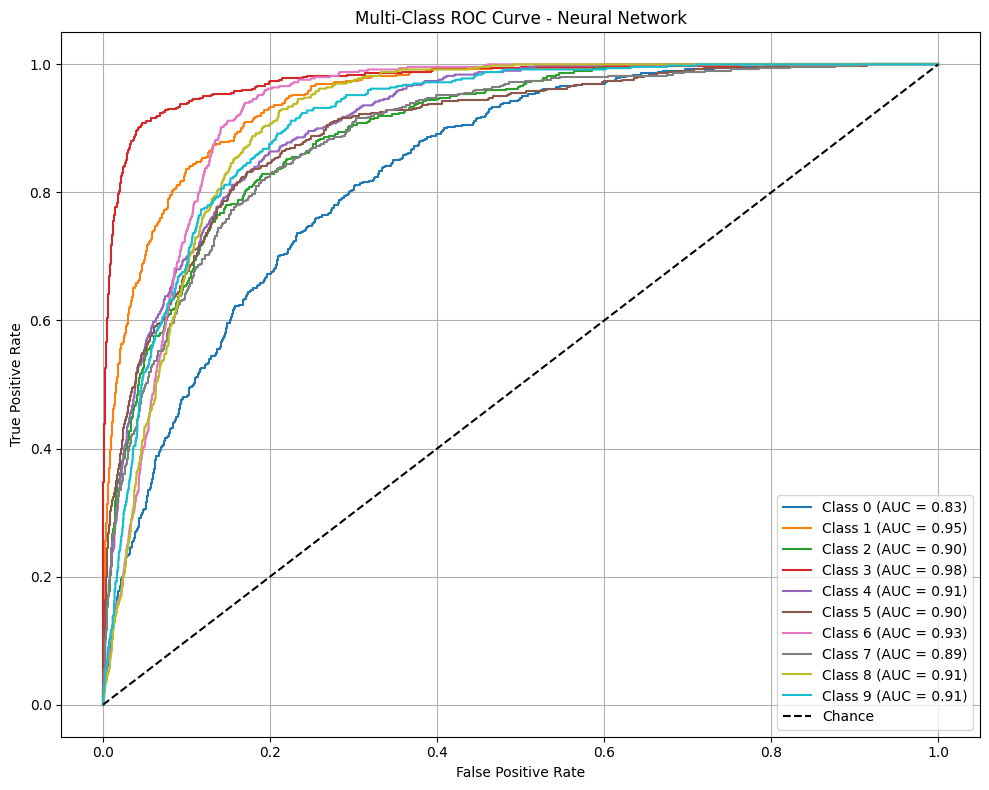

In [67]:
# Put model in evaluation mode
model_fnn.eval()

# Forward pass to get logits
with torch.no_grad():
    logits = model_fnn(X_test_pca_pth.float())
    probs = F.softmax(logits, dim=1).cpu().numpy()

# One-hot encode the true labels
y_true = label_binarize(y_test_pca_pth.cpu().numpy(), classes=np.arange(probs.shape[1]))

# Plot ROC for each class
plt.figure(figsize=(10, 8))

for i in range(probs.shape[1]):
    fpr, tpr, _ = roc_curve(y_true[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Random Forest

In [68]:
random_forest = RandomForestClassifier(n_estimators=100, max_samples=0.75, max_features=0.75,bootstrap=True, criterion='gini').fit(X_train_pca, y_train_pca)

y_score = random_forest.predict_proba(X_test_pca)

# Compute multiclass AUC
rf_auc = roc_auc_score(y_test_pca, y_score, multi_class='ovr', average='macro')

print("Multiclass AUC of Random Forest Model:", rf_auc)

Multiclass AUC of Random Forest Model: 0.8658500888888888


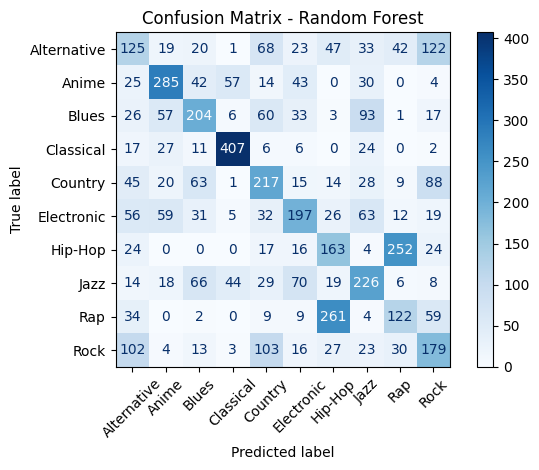

Accuracy: 42.50%


In [69]:
# Predict on test set
y_pred = random_forest.predict(X_test_pca)

# Compute confusion matrix
cm = confusion_matrix(y_test_pca, y_pred)

# Display it with class labels if you have them
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

accuracy = accuracy_score(y_test_pca, y_pred)
print(f"Accuracy: {accuracy:.2%}")

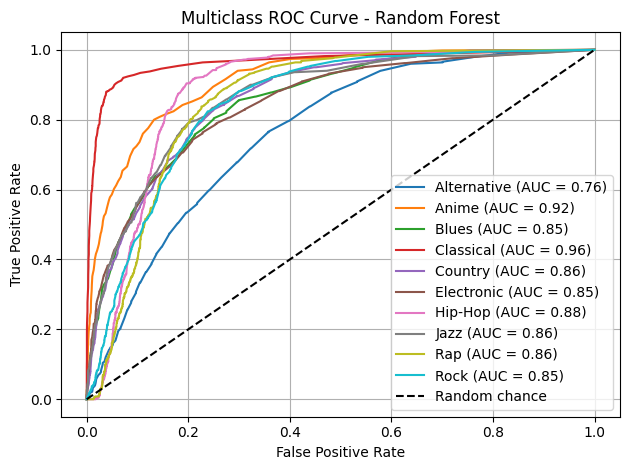

In [70]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

classes = np.unique(y_test_pca)
y_test_bin = label_binarize(y_test_pca, classes=classes)

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{le.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

#### ADABoost

In [108]:
adaboost = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=5), algorithm="SAMME", n_estimators=150, learning_rate=0.5
).fit(X_train_pca, y_train_pca)

y_score = adaboost.predict_proba(X_test_pca)
ada_auc = roc_auc_score(y_test_pca, y_score, multi_class='ovr', average='macro')

print("Multiclass AUC of ADABoosted Model:", ada_auc)

Multiclass AUC of ADABoosted Model: 0.8510317333333333


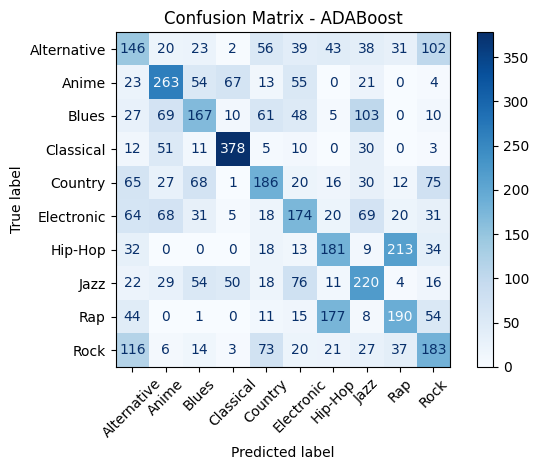

Accuracy: 41.76%


In [109]:
# Predict on test set
y_pred = adaboost.predict(X_test_pca)

# Compute confusion matrix
cm = confusion_matrix(y_test_pca, y_pred)

# Display it with class labels if you have them
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix - ADABoost')
plt.tight_layout()
plt.show()

accuracy = accuracy_score(y_test_pca, y_pred)
print(f"Accuracy: {accuracy:.2%}")

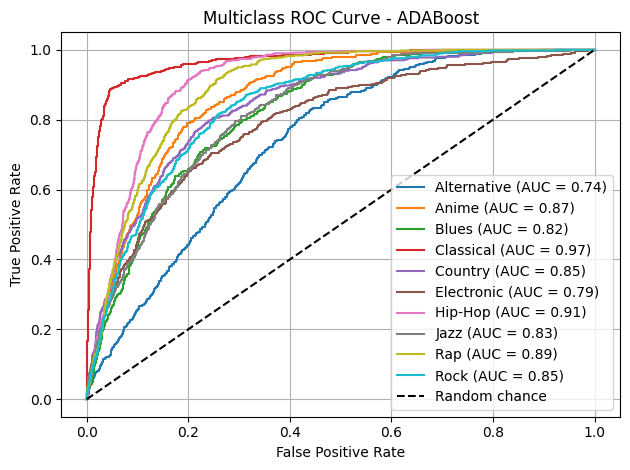

In [110]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

classes = np.unique(y_test_pca)
y_test_bin = label_binarize(y_test_pca, classes=classes)

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{le.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - ADABoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Final Checks

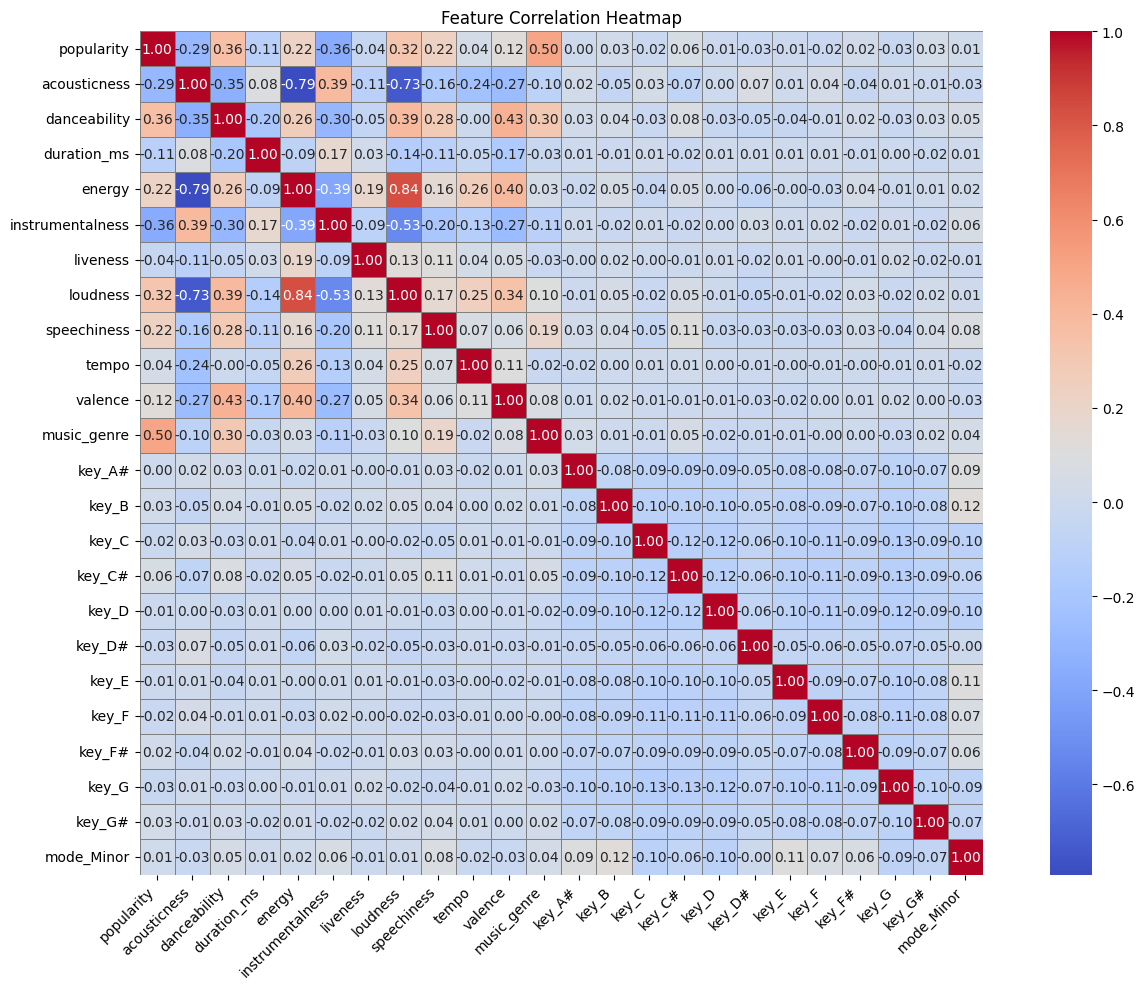

In [71]:
# checking correlation
corr_matrix = df.corr()


plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True,
            linewidths=0.5, linecolor='gray')
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Visualization
Attempts to visualize the Neural Network structure using a flowchart

In [169]:
!pip install torchsummary


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [170]:
from torchsummary import summary
# Print summary
summary(model, input_size=(X_train_pth.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 32]             768
            Linear-2                   [-1, 10]             330
Total params: 1,098
Trainable params: 1,098
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [176]:
!pip install torchview


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


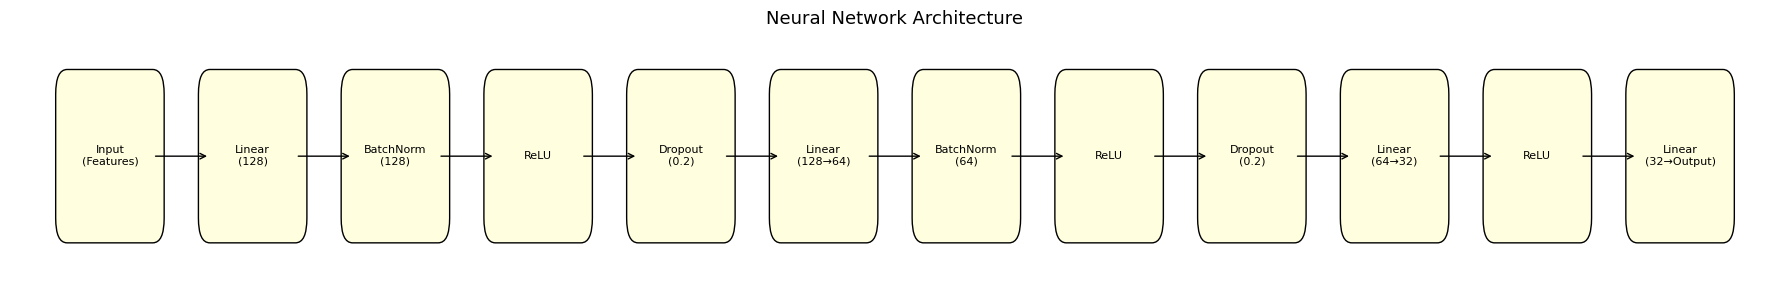

In [179]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the layers with I/O sizes and updated positions
layers = [
    ("Input\n(Features)", (0.0, 0.5)),
    ("Linear\n(128)", (0.25, 0.5)),
    ("BatchNorm\n(128)", (0.50, 0.5)),
    ("ReLU", (0.75, 0.5)),
    ("Dropout\n(0.2)", (1.00, 0.5)),
    ("Linear\n(128→64)", (1.25, 0.5)),
    ("BatchNorm\n(64)", (1.50, 0.5)),
    ("ReLU", (1.75, 0.5)),
    ("Dropout\n(0.2)", (2.00, 0.5)),
    ("Linear\n(64→32)", (2.25, 0.5)),
    ("ReLU", (2.50, 0.5)),
    ("Linear\n(32→Output)", (2.75, 0.5)),
]

# Create the plot
fig, ax = plt.subplots(figsize=(18, 3))
for label, (x, y) in layers:
    box = patches.FancyBboxPatch((x, y), 0.15, 0.1,
                                 boxstyle="round,pad=0.02",
                                 edgecolor='black',
                                 facecolor='lightyellow')
    ax.add_patch(box)
    ax.text(x + 0.075, y + 0.05, label, ha='center', va='center', fontsize=8)

# Draw arrows between layers
for i in range(len(layers) - 1):
    x_start, y_start = layers[i][1]
    x_end, y_end = layers[i + 1][1]
    ax.annotate('', xy=(x_end, y_end + 0.05), xytext=(x_start + 0.15, y_start + 0.05),
                arrowprops=dict(arrowstyle="->", lw=1.0))

# Formatting
ax.set_xlim(-0.1, 3.0)
ax.set_ylim(0.45, 0.65)
ax.axis('off')
plt.title("Neural Network Architecture", fontsize=13)
plt.tight_layout()
plt.show()

## PCA clusters

In [245]:
# recleaning the DataFrame
df_og = pd.read_csv('musicData.csv')
df_og = df_og.dropna()
df_og = df_og.drop(columns = ['instance_id', 'artist_name', 'track_name', 'obtained_date'])
df_og['tempo'] = pd.to_numeric(df_og['tempo'], errors='coerce')
df_og['key'] = df_og['key'].astype(str) 
df_og['mode'] = df_og['mode'].astype(str)  
df_og['music_genre'] = df['music_genre'].astype(str) 
# Replace -1.0 with NaN for easier handling
df_og['duration_ms'] = df_og['duration_ms'].replace(-1.0, pd.NA)

# Impute duration per genre
df_og['duration_ms'] = df_og.groupby('music_genre')['duration_ms'].transform(lambda x: x.fillna(x.median()))

# Impute tempo per genre
df_og['tempo'] = df_og.groupby('music_genre')['tempo'].transform(lambda x: x.fillna(x.median()))

/var/folders/5y/x9lllwn57cl49d4_g_834x4m0000gn/T/ipykernel_83454/4003940936.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_og['duration_ms'] = df_og.groupby('music_genre')['duration_ms'].transform(lambda x: x.fillna(x.median()))
/var/folders/5y/x9lllwn57cl49d4_g_834x4m0000gn/T/ipykernel_83454/4003940936.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_og['duration_ms'] = df_og.groupby('music_genre')['duration_ms'].transform(lambda x: x.fillna(x.median()))
/var/folders/5y/x9lllwn57cl49d4_g_834x4m0000gn/T/ipykernel_83454/4003940936.py:12: F

In [248]:
# attaching labels from KMeans
df_labeled = df_og.copy()
df_labeled['cluster'] = labels

# extracting and displaying meaningful information about the features based on KMeans clusters
numeric_cols = [col for col in df_labeled.select_dtypes(include=['float64', 'int64']).columns if col != 'cluster']
categorical_cols = df_labeled.select_dtypes(include=['object', 'bool']).columns


cluster_means = df_labeled.groupby('cluster')[numeric_cols].mean()
cluster_medians = df_labeled.groupby('cluster')[numeric_cols].median()


cluster_value_counts = {}
for col in categorical_cols:
    cluster_value_counts[col] = df_labeled.groupby('cluster')[col].value_counts().unstack(fill_value=0)


print("Cluster-wise Mean Values:")
print(cluster_means)

print("\nCluster-wise Median Values:")
print(cluster_medians)

print("\nCluster-wise Categorical Value Counts:")
for col, table in cluster_value_counts.items():
    print(f"\n{col}:\n", table)


Cluster-wise Mean Values:
         popularity  acousticness  danceability    duration_ms    energy  \
cluster                                                                    
0         40.325377      0.113759      0.505500  258567.606440  0.773059   
1         52.889032      0.269777      0.682304  217244.383509  0.602258   
2         30.890109      0.866641      0.360219  279822.021230  0.175447   

         instrumentalness  liveness   loudness  speechiness       tempo  \
cluster                                                                   
0                0.149411  0.251298  -6.127253     0.072858  133.154700   
1                0.058210  0.157761  -7.870499     0.130705  113.159349   
2                0.582584  0.150238 -19.691776     0.046268  104.749665   

          valence  
cluster            
0        0.465233  
1        0.538124  
2        0.220102  

Cluster-wise Median Values:
         popularity  acousticness  danceability  duration_ms  energy  \
cluster         

In [247]:
df_labeled

popularity  acousticness  danceability  duration_ms  energy  \
0            27.0       0.00468         0.652     245217.0   0.941   
1            31.0       0.01270         0.622     218293.0   0.890   
2            28.0       0.00306         0.620     215613.0   0.755   
3            34.0       0.02540         0.774     166875.0   0.700   
4            32.0       0.00465         0.638     222369.0   0.587   
...           ...           ...           ...          ...     ...   
50000        59.0       0.03340         0.913     215240.0   0.574   
50001        72.0       0.15700         0.709     251860.0   0.362   
50002        51.0       0.00597         0.693     189483.0   0.763   
50003        65.0       0.08310         0.782     262773.0   0.472   
50004        67.0       0.10200         0.862     267267.0   0.642   

       instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
0               0.79200  A#     0.115    -5.201  Minor       0.0748  100.889   
1               0.95000   D     0.124    -7.043  Minor       0.0300  115.002   
2               0.01180  G#     0.534    -4.617  Major       0.0345  127.994   
3               0.00253  C#     0.157    -4.498  Major       0.2390  128.014   
4               0.90900  F#     0.157    -6.266  Major       0.0413  145.036   
...                 ...  ..       ...       ...    ...          ...      ...   
50000           0.00000  C#     0.119    -7.022  Major       0.2980   98.028   
50001           0.00000   B     0.109    -9.814  Major       0.0550  122.043   
50002           0.00000   D     0.143    -5.443  Major       0.1460  131.079   
50003           0.00000   G     0.106    -5.016  Minor       0.0441   75.886   
50004           0.00000  F#     0.272   -13.652  Minor       0.1010   99.201   

       valence music_genre  cluster  
0        0.759           5        0  
1        0.531           5        0  
2        0.333           5        0  
3        0.270           5        1  
4        0.323           5        0  
...        ...         ...      ...  
50000    0.330           6        1  
50001    0.113           6        1  
50002    0.395           6        1  
50003    0.354           6        1  
50004    0.765           6        1  

[50000 rows x 15 columns]